# Team 6: Data mining project 

# Project Title: Youth at Risk: Predicting Suicidal Behavior in Teens 

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency
import scipy.stats as stats
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.impute import KNNImputer

import shap
import warnings
warnings.filterwarnings('ignore')

### Loading the clean dataset for our project after we have mapped all the features 

In [4]:
# Loading the dataset
yrbs_survey_mapped_original_df = pd.read_csv('yrbs_mapped_final_clean.csv')

### Descriptive statistics of the clean data

In [7]:
# Printing the orginal dataset
yrbs_survey_mapped_original_df.head()

,site,race_ethnicity,height_raw_ft_in,weight_pounds,record,orig_rec,race_select,height_m,weight_kg,bmi_percentile,...,source_of_alcohol_L30d,sports_drink_consumption_L7d,sports_team_participation_L12m,suburn_L12m,texting_driving_L30d,threatened_at_school_weapon_L12m,tried_quitting_all_tobacco_products_L12m,water_consumption_L7d,weapon_carry_school_L30d,weight_loss_attempt
0,XX,3.0,502.0,155.0,1,NaN,C,1.57,70.31,94.097808,...,i_took_it_from_a_store_or_family_member,i_did_not_drink_sports_drinks_during_the_past_...,2_teams,0_times,i_did_not_drive_a_car_or_other_vehicle_during_...,0_times,no,4_to_6_times_during_the_past_7_days,0_days,lose_weight
1,XX,7.0,509.0,NaN,2,NaN,A DE,NaN,NaN,NaN,...,i_did_not_drink_alcohol_during_the_past_30_days,1_to_3_times_during_the_past_7_days,0_teams,2_times,i_did_not_drive_a_car_or_other_vehicle_during_...,0_times,no,3_times_per_day,0_days,lose_weight
2,XX,6.0,507.0,136.0,3,NaN,NaN,1.70,61.69,65.303280,...,i_did_not_drink_alcohol_during_the_past_30_days,i_did_not_drink_sports_drinks_during_the_past_...,0_teams,2_times,i_did_not_drive_a_car_or_other_vehicle_during_...,0_times,"i_did_not_use_cigarettes,_electronic_vapor_pro...",2_times_per_day,0_days,i_am_not_trying_to_do_anything_about_my_weight
3,XX,6.0,509.0,133.0,4,NaN,NaN,1.75,60.33,42.734624,...,missing,i_did_not_drink_sports_drinks_during_the_past_...,0_teams,2_times,0_days,0_times,yes,4_or_more_times_per_day,0_days,gain_weight
4,XX,7.0,603.0,196.0,5,NaN,A DE,1.90,88.91,91.260653,...,i_got_it_some_other_way,4_to_6_times_during_the_past_7_days,0_teams,2_times,i_did_not_drive_a_car_or_other_vehicle_during_...,0_times,"i_did_not_use_cigarettes,_electronic_vapor_pro...",4_or_more_times_per_day,0_days,stay_the_same_weight


In [9]:
# Printing the shape of orginal dataset
yrbs_survey_mapped_original_df.shape

(17232, 109)

In [11]:
yrbs_survey_mapped_original_df.info

<bound method DataFrame.info of       site  race_ethnicity height_raw_ft_in weight_pounds  record  orig_rec  \
0       XX             3.0            502.0         155.0       1       NaN   
1       XX             7.0            509.0           NaN       2       NaN   
2       XX             6.0            507.0         136.0       3       NaN   
3       XX             6.0            509.0         133.0       4       NaN   
4       XX             7.0            603.0         196.0       5       NaN   
...    ...             ...              ...           ...     ...       ...   
17227   XX             5.0            411.0         150.0   17502       NaN   
17228   XX             5.0            600.0         165.0   17503       NaN   
17229   XX             5.0            507.0         200.0   17504       NaN   
17230   XX             5.0            506.0         190.0   17505       NaN   
17231   XX             5.0            502.0         125.0   17507       NaN   

      race_select  

### Summary Statistics of the dataset

In [14]:
# Calculating the summary statistics of orginal dataset
yrbs_survey_mapped_original_df.describe()

,race_ethnicity,record,orig_rec,height_m,weight_kg,bmi_percentile,survey_weight,startum,psu_code
count,16800.000000,17232.000000,0.0,14896.000000,14896.000000,1.489600e+04,17232.000000,17232.000000,17232.000000
mean,5.024583,8701.564473,NaN,1.694811,68.500922,6.387073e+01,0.999998,164.830142,476743.343547
std,1.497520,5045.220752,NaN,0.101926,18.525666,2.950017e+01,1.036395,49.003162,225406.041443
min,1.000000,1.000000,NaN,1.270000,22.680000,7.540000e-08,0.038300,101.000000,87023.000000
25%,5.000000,4334.750000,NaN,1.630000,55.340000,4.163382e+01,0.199600,104.000000,329911.000000
50%,5.000000,8663.500000,NaN,1.700000,64.410000,6.995742e+01,0.641000,201.000000,516567.000000
75%,6.000000,13057.250000,NaN,1.780000,77.110000,9.083185e+01,1.376600,203.000000,687033.000000
max,8.000000,17507.000000,NaN,2.030000,180.990000,9.995345e+01,4.172600,214.000000,788874.000000


In [16]:
# Creating a copy of the dataFrame
yrbs_survey_mapped_df = yrbs_survey_mapped_original_df.copy()

### Checking for missing values in the data 

In [19]:
# Defining function to get counts of NaN, None, and 0 for all columns and also total missing
def get_missing_counts_by_column(df):
    total_count = len(df)
    # Count of 0s
    zero_count = (df == 0).sum()
    # Count of all null-like values
    null_count = df.isnull().sum()
    # Count of explicit 'missing' values
    missing_string_count = (df == 'missing').sum()

    # df to summarize results
    report = pd.DataFrame({
        'column': df.columns,
        'total_row_count': total_count,
        'null_count': null_count,
        'missing_count': missing_string_count,
        'zero_count': zero_count
    })

    # Total column summing all counts for each missing column
    report['total_missing'] = report[['zero_count', 'null_count', 'missing_count']].sum(axis=1)

    return report

In [21]:
# Applying function on the data
missing_summary = get_missing_counts_by_column(yrbs_survey_mapped_df)

# % missing
missing_summary['pecentage_missing'] = (missing_summary['total_missing'] / missing_summary['total_row_count'] * 100)

# Sorting by descending on % missing
missing_summary = missing_summary.sort_values(by='total_missing', ascending=False)

In [23]:
missing_summary.head(50)

,column,total_row_count,null_count,missing_count,zero_count,total_missing,pecentage_missing
orig_rec,orig_rec,17232,17232,0,0,17232,100.000000
difficulty_concentrating,difficulty_concentrating,17232,0,8181,0,8181,47.475627
sports_drink_consumption_L7d,sports_drink_consumption_L7d,17232,0,8149,0,8149,47.289926
parental_monitoring,parental_monitoring,17232,0,8140,0,8140,47.237697
english_fluency,english_fluency,17232,0,8109,0,8109,47.057799
suburn_L12m,suburn_L12m,17232,0,8101,0,8101,47.011374
muscle_strengthening_L7d,muscle_strengthening_L7d,17232,0,7973,0,7973,46.268570
ever_tried_hallucinogenic_drugs,ever_tried_hallucinogenic_drugs,17232,0,7968,0,7968,46.239554
weight_loss_attempt,weight_loss_attempt,17232,0,7959,0,7959,46.187326
feel_close_people_school,feel_close_people_school,17232,0,7863,0,7863,45.630223


### After analyzing the summary report of the missing values, we arrived at a decision that we will remove the columns which have more than 40 percent missing values as they will not help us in predicting the suicide behavior

In [26]:
# Calculating the columns that have more than 40 percent missing values
remove_cols_df = missing_summary[missing_summary['pecentage_missing']>40]
remove_cols_df

,column,total_row_count,null_count,missing_count,zero_count,total_missing,pecentage_missing
orig_rec,orig_rec,17232,17232,0,0,17232,100.000000
difficulty_concentrating,difficulty_concentrating,17232,0,8181,0,8181,47.475627
sports_drink_consumption_L7d,sports_drink_consumption_L7d,17232,0,8149,0,8149,47.289926
parental_monitoring,parental_monitoring,17232,0,8140,0,8140,47.237697
english_fluency,english_fluency,17232,0,8109,0,8109,47.057799
suburn_L12m,suburn_L12m,17232,0,8101,0,8101,47.011374
muscle_strengthening_L7d,muscle_strengthening_L7d,17232,0,7973,0,7973,46.268570
ever_tried_hallucinogenic_drugs,ever_tried_hallucinogenic_drugs,17232,0,7968,0,7968,46.239554
weight_loss_attempt,weight_loss_attempt,17232,0,7959,0,7959,46.187326
feel_close_people_school,feel_close_people_school,17232,0,7863,0,7863,45.630223


In [28]:
len(remove_cols_df)

18

In [30]:
remove_cols = remove_cols_df['column'].values
remove_cols

array(['orig_rec', 'difficulty_concentrating',
       'sports_drink_consumption_L7d', 'parental_monitoring',
       'english_fluency', 'suburn_L12m', 'muscle_strengthening_L7d',
       'ever_tried_hallucinogenic_drugs', 'weight_loss_attempt',
       'feel_close_people_school', 'milk_drinking_L7d',
       'STD_testing_L12m', 'mental_health_during_pandemic',
       'smoked_cigarettes_per_day_L30d',
       'current_prescription_meds_without_doc_consult_L30d',
       'ever_tried_synthetic_marijuana', 'ever_tried_inhalants',
       'source_of_alcohol_L30d'], dtype=object)

In [32]:
# Removing the columns which have more than 40 percent missing values
yrbs_survey_mapped_df.drop(remove_cols, axis = 1, inplace = True)

In [34]:
# Verifying if the columns are removed correctly
yrbs_survey_mapped_df.columns

Index(['site', 'race_ethnicity', 'height_raw_ft_in', 'weight_pounds', 'record',
       'race_select', 'height_m', 'weight_kg', 'bmi_percentile',
       'survey_weight', 'startum', 'psu_code', 'HIV_testing',
       'actually_attempted_suicide_L12m', 'age',
       'age_first_sexual_intercourse', 'alcohol_drugs_before_last_sex',
       'birth_control_pill_use', 'breakfast_eating_L7d',
       'bullied_at_school_L12m', 'carrot_eating_L7d', 'concussion_L12m',
       'condom_use', 'current_binge_drinking_L30d', 'current_cigar_use_L30d',
       'current_electronic_vapor_use_L30d', 'current_marijuana_use_L30d',
       'current_mental_health_L30d', 'current_sexual_activity_L3m',
       'current_smokeless_tobacco_use_L30d', 'currently_drank_alcohol_L30d',
       'currently_smoked_cigarettes_L30d', 'drunk_driving_L30d',
       'electronic_vapor_product_purchase_place_L30d',
       'electronically_bullied_L12m', 'ever_had_sexual_intercourse',
       'ever_injected_illegal_drugs',
       'ever_took_

### Checking for unique values and droping missing values from target variable

In [37]:
# Finding unique values in the 'seriously_considered_attempting_suicide_L12m' column
unique_values = yrbs_survey_mapped_df['seriously_considered_attempting_suicide_L12m'].unique()

# Displaying the unique values
print("Unique values in 'seriously_considered_attempting_suicide_L12m':")
print(unique_values)

Unique values in 'seriously_considered_attempting_suicide_L12m':
['yes' 'no' 'missing']


In [39]:
# Droppping missing from target
yrbs_survey_mapped_df.drop(yrbs_survey_mapped_df[yrbs_survey_mapped_df['seriously_considered_attempting_suicide_L12m'] == 'missing'].index, inplace=True)

In [41]:
# Checking unique values
yrbs_survey_mapped_df['seriously_considered_attempting_suicide_L12m'].unique()

array(['yes', 'no'], dtype=object)

### Dropping the column site based on visual inspection since the columns have the same value throughout the data set. Dropping the columns that don't add value to the target variable and duplicate features

In [44]:
# List of columns to drop
columns_to_drop = ['survey_weight', 'actually_attempted_suicide_L12m', 'injurious_suicide_attempt_L12m',
                   'record', 'psu_code', 'startum', 'made_suicide_plan_L12m', 'bmi_percentile', 'site', 'height_raw_ft_in',
                   'weight_pounds','carrot_eating_L7d', 'fruit_eating_L7d', 'fruit_juice_drinking_L7d',
                   'green_salad_eating_L7d', 'other_vegetable_eating_L7d', 'potato_eating_L7d', 'breakfast_eating_L7d']

# Dropping the specified columns
yrbs_survey_mapped_df = yrbs_survey_mapped_df.drop(columns=columns_to_drop, axis=1)

In [46]:
len(columns_to_drop)

18

In [48]:
# Verifying if the columns are removed correctly
yrbs_survey_mapped_df.columns

Index(['race_ethnicity', 'race_select', 'height_m', 'weight_kg', 'HIV_testing',
       'age', 'age_first_sexual_intercourse', 'alcohol_drugs_before_last_sex',
       'birth_control_pill_use', 'bullied_at_school_L12m', 'concussion_L12m',
       'condom_use', 'current_binge_drinking_L30d', 'current_cigar_use_L30d',
       'current_electronic_vapor_use_L30d', 'current_marijuana_use_L30d',
       'current_mental_health_L30d', 'current_sexual_activity_L3m',
       'current_smokeless_tobacco_use_L30d', 'currently_drank_alcohol_L30d',
       'currently_smoked_cigarettes_L30d', 'drunk_driving_L30d',
       'electronic_vapor_product_purchase_place_L30d',
       'electronically_bullied_L12m', 'ever_had_sexual_intercourse',
       'ever_injected_illegal_drugs',
       'ever_took_prescription_meds_without_doc_consult',
       'ever_tried_cigarette_smoking', 'ever_tried_cocaine',
       'ever_tried_ecstacy', 'ever_tried_heroin', 'ever_tried_marijuana',
       'ever_tried_methamphetamines', 'ever_us

### Verifying with dominant features

In [51]:
# Defining a function to identify if a value in a column accounts for >80% of the values
def identify_dominant_categories(df, threshold=0.8, exclude_cols=None):
    # Initializing exclude_cols if None
    if exclude_cols is None:
        exclude_cols = []
    
    # Getting categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col not in exclude_cols]
    
    # Initializing results storage
    analysis_results = []
    columns_to_remove = []
    
    # Analyzing each categorical column
    for col in categorical_cols:
        # Calculating value counts and proportions
        value_counts = df[col].value_counts()
        value_props = df[col].value_counts(normalize=True)
        
        # Finding the dominant category and its proportion
        dominant_category = value_props.index[0]
        dominant_proportion = value_props.iloc[0]
        
        # Storing analysis results
        analysis_results.append({
            'column': col,
            'unique_values': len(value_counts),
            'dominant_category': dominant_category,
            'dominant_proportion': dominant_proportion,
            'dominant_count': value_counts.iloc[0],
            'total_count': len(df),
            'missing_count': df[col].isna().sum(),
            'missing_proportion': df[col].isna().mean(),
            'should_remove': dominant_proportion > threshold
        })
        
        # Marking for removal if dominant proportion exceeds threshold
        if dominant_proportion > threshold:
            columns_to_remove.append(col)
    
    # Creating analysis DataFrame
    analysis_df = pd.DataFrame(analysis_results)
    analysis_df = analysis_df.sort_values('dominant_proportion', ascending=False)
    
    # Creating cleaned DataFrame
    df_cleaned = df.drop(columns=columns_to_remove)
    
    # Print summary
    print(f"\nAnalysis Summary:")
    print(f"Total categorical columns analyzed: {len(categorical_cols)}")
    print(f"Columns marked for removal: {len(columns_to_remove)}")
    print(f"Threshold used: {threshold*100}%")
    
    print("\nColumns Removed:")
    if columns_to_remove:
        removed_analysis = analysis_df[analysis_df['should_remove']].sort_values('dominant_proportion', ascending=False)
        print(removed_analysis[['column', 'dominant_category', 'dominant_proportion', 'unique_values']].to_string())
    else:
        print("No columns met the removal criteria")
    
    # Format analysis DataFrame
    analysis_df['dominant_proportion'] = analysis_df['dominant_proportion'].map('{:.1%}'.format)
    analysis_df['missing_proportion'] = analysis_df['missing_proportion'].map('{:.1%}'.format)
    
    return df_cleaned, analysis_df, columns_to_remove

In [53]:
# Specifying target and other important variables to be excluded
exclude_cols = ['seriously_considered_attempting_suicide_L12m', 'current_cigar_use_L30d', 'current_smokeless_tobacco_use_L30d', 
                'electronically_bullied_L12m', 'bullied_at_school_L12m', 'currently_smoked_cigarettes_L30d', 'current_marijuana_use_L30d']

# Running the analysis
yrbs_survey_mapped_df_cleaned, analysis, removed_cols = identify_dominant_categories(
    yrbs_survey_mapped_df, 
    threshold=0.8, 
    exclude_cols=exclude_cols
)

# Printing detailed analysis
print("\nDetailed analysis of categorical variables:")
print(analysis.sort_values('dominant_proportion', ascending=False).to_string())

# Printing shape comparison
print(f"\nOriginal df shape: {yrbs_survey_mapped_df.shape}")
print(f"Cleaned df shape: {yrbs_survey_mapped_df_cleaned.shape}")


Analysis Summary:
Total categorical columns analyzed: 63
Columns marked for removal: 8
Threshold used: 80.0%

Columns Removed:
                                             column dominant_category  dominant_proportion  unique_values
21                                ever_tried_heroin           0_times             0.964967              7
23                      ever_tried_methamphetamines           0_times             0.960300              7
49                   safety_concerns_at_school_L30d            0_days             0.913393              6
59                 threatened_at_school_weapon_L12m           0_times             0.904295              9
46                       physical_fight_school_L12m           0_times             0.897206              9
17  ever_took_prescription_meds_without_doc_consult           0_times             0.861464              7
48                 riding_with_drinking_driver_L30d           0_times             0.842382              6
41                   off

### Creating a new variable Tobacco_products_use using existing variables such as 'current_cigar_use_L30d', 'current_electronic_vapor_use_L30d', 'current_smokeless_tobacco_use_L30d', 'currently_smoked_cigarettes_L30d' as they are related to Tobacco
- https://portal.ct.gov/-/media/departments-and-agencies/dph/dph/hems/tobacco/tobaccoproductspdf.pdf

In [56]:
# Defining a variable for tobacco usage columns

# Listing the columns to check for unique rows
columns_to_check = [
    'current_cigar_use_L30d', 
    'current_electronic_vapor_use_L30d', 
    'current_smokeless_tobacco_use_L30d', 
    'currently_smoked_cigarettes_L30d'
]

# Get unique rows based on the specified columns
unique_rows = yrbs_survey_mapped_df_cleaned[columns_to_check].drop_duplicates()

In [58]:
# Defining the list of values indicating tobacco product use
tobacco_use_values = ['1_or_2_days','3_to_5_days','6_to_9_days','10_to_19_days', '20_to_29_days', 'all_30_days']

# Listing of columns to check
columns_to_check = ['current_cigar_use_L30d', 'current_electronic_vapor_use_L30d', 
                    'current_smokeless_tobacco_use_L30d', 'currently_smoked_cigarettes_L30d']  

# Creating a new column 'tobacco_product_use' based on the condition
yrbs_survey_mapped_df_cleaned['Tobacco_products_use'] = yrbs_survey_mapped_df_cleaned[columns_to_check].apply(
    lambda row: 'Yes' if any(val in tobacco_use_values for val in row) else 'No',
    axis=1
)

# Displaying the first few rows to verify
yrbs_survey_mapped_df_cleaned['Tobacco_products_use'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: Tobacco_products_use, dtype: object

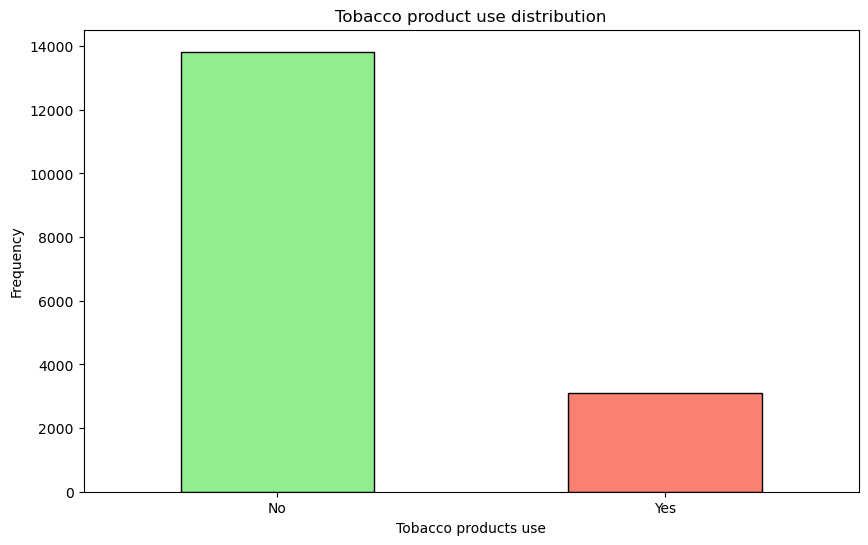

In [60]:
# Define colors for "Yes" and "No"
colors = ['lightgreen' if x == 'No' else 'salmon' for x in yrbs_survey_mapped_df_cleaned['Tobacco_products_use'].value_counts().index]

# Plot the bar chart with specific colors for each category
plt.figure(figsize=(10, 6))
yrbs_survey_mapped_df_cleaned['Tobacco_products_use'].value_counts().plot(
    kind='bar', 
    color=colors, 
    edgecolor='black'
)
plt.xlabel('Tobacco products use')
plt.ylabel('Frequency')
plt.title('Tobacco product use distribution')
plt.xticks(rotation=0)
plt.show()


### Once the variables are created we are dropping the original features('current_cigar_use_L30d', 'current_electronic_vapor_use_L30d', 'current_smokeless_tobacco_use_L30d',  'currently_smoked_cigarettes_L30d')

In [63]:
# Dropping the features
yrbs_survey_mapped_df_cleaned = yrbs_survey_mapped_df_cleaned.drop(columns=['current_cigar_use_L30d', 'current_electronic_vapor_use_L30d',
'current_smokeless_tobacco_use_L30d',  'currently_smoked_cigarettes_L30d'])

### Race Ethnicity colums mapping and checking the relationship with target variable (seriously considered suicide)
- https://youth.gov/federal-links/report-racial-and-gender-disparities-suicide-among-young-adults
- https://www.kidsdata.org/topic/209/suicides-race/table#fmt=124&loc=2,127,347,1763,331,348,336,171,321,345,357,332,324,369,358,362,360,337,327,364,356,217,353,328,354,323,352,320,339,334,365,343,330,367,344,355,366,368,265,349,361,4,273,59,370,326,333,322,341,338,350,342,329,325,359,351,363,340,335&tf=110&ch=7,11,8,10,9,73,1502

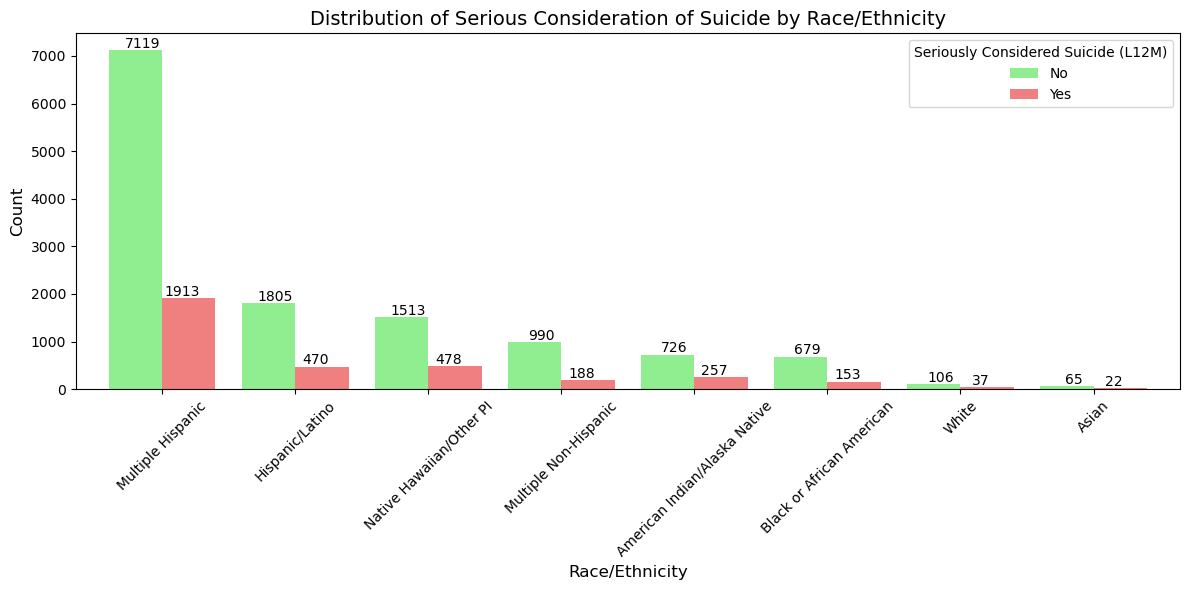

In [66]:
import matplotlib.pyplot as plt

# Define the mapping for categorical labels
race_mapping = {
    1.0: 'White',
    2.0: 'Black or African American',
    3.0: 'Hispanic/Latino',
    4.0: 'Asian',
    5.0: 'Multiple Hispanic',
    6.0: 'Multiple Non-Hispanic',
    7.0: 'Native Hawaiian/Other PI',
    8.0: 'American Indian/Alaska Native',
}

# Replace numerical codes in the dataset with categorical labels
yrbs_survey_mapped_df_cleaned['race_ethnicity'] = yrbs_survey_mapped_df_cleaned['race_ethnicity'].map(race_mapping)

# Group the data by race_ethnicity and seriously_considered_attempting_suicide_L12m, and count occurrences
grouped_data = yrbs_survey_mapped_df_cleaned.groupby(
    ['race_ethnicity', 'seriously_considered_attempting_suicide_L12m']
).size().unstack(fill_value=0)

# Ensure the data is numeric
grouped_data = grouped_data.astype(int)

# Sort groups by the total number of answers in descending order
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Plot a grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'lightcoral'], width=0.8)

# Annotate counts above each bar
for i, (index, row) in enumerate(grouped_data.iterrows()):
    # Get the counts of "Yes" and "No"
    yes = row.get('yes', 0)
    no = row.get('no', 0)
    
    # Annotate the "No" count above the green bar
    ax.text(i - 0.15, no + 50, f"{no}", ha='center', fontsize=10, color='black')  # Shift slightly left (-0.15)
    
    # Annotate the "Yes" count above the red bar
    ax.text(i + 0.15, yes + 50, f"{yes}", ha='center', fontsize=10, color='black')  # Shift slightly right (+0.15)

# Customize the chart
plt.title('Distribution of Serious Consideration of Suicide by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Seriously Considered Suicide (L12M)', labels=['No', 'Yes'], fontsize=10)
plt.tight_layout()
plt.show()

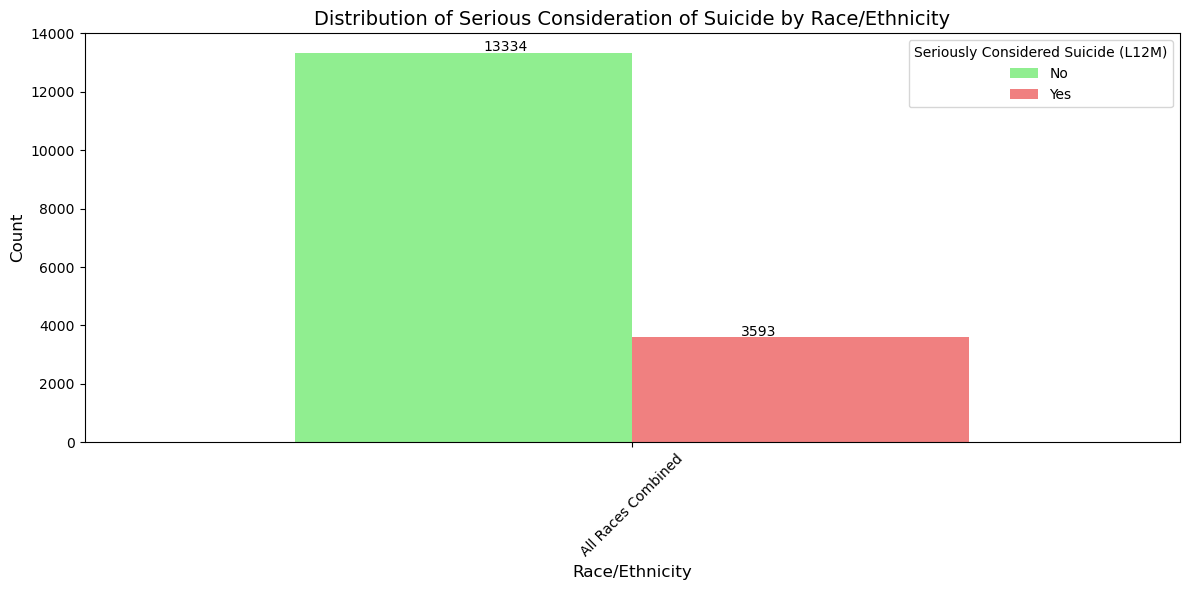

In [72]:
# Define the mapping for categorical labels
race_mapping = {
    1.0: 'White',
    2.0: 'Black or African American',
    3.0: 'Hispanic/Latino',
    4.0: 'Asian',
    5.0: 'Multiple Hispanic',
    6.0: 'Multiple Non-Hispanic',
    7.0: 'Native Hawaiian/Other PI',
    8.0: 'American Indian/Alaska Native',
}

# Map race codes to labels and handle unmapped values
yrbs_survey_mapped_df_cleaned['race_ethnicity'] = yrbs_survey_mapped_df_cleaned['race_ethnicity'].map(race_mapping).fillna('Unknown')

# Group the data by race and suicide consideration
grouped_data = yrbs_survey_mapped_df_cleaned.groupby(
    ['race_ethnicity', 'seriously_considered_attempting_suicide_L12m']
).size().unstack(fill_value=0)

# Ensure the data is numeric
grouped_data = grouped_data.astype(int)

# Add a total column, sort by it, then remove it after sorting
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False).drop(columns=['Total'])

# Replace 'Unknown' with a more descriptive label for all races combined
if 'Unknown' in grouped_data.index and len(grouped_data.index) == 1:
    grouped_data.index = ['All Races Combined']

# Plot the grouped bar chart with lighter colors
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'lightcoral'], width=0.8)

# Annotate counts above each bar
for i, (index, row) in enumerate(grouped_data.iterrows()):
    # Get the counts of "Yes" and "No"
    yes = row.get('yes', 0)
    no = row.get('no', 0)
    
    # Annotate the "No" count above the green bar
    ax.text(i - 0.15, no + 50, f"{no}", ha='center', fontsize=10, color='black')  # Slightly shift left (-0.15)
    
    # Annotate the "Yes" count above the red bar
    ax.text(i + 0.15, yes + 50, f"{yes}", ha='center', fontsize=10, color='black')  # Slightly shift right (+0.15)

# Customize the chart
plt.title('Distribution of Serious Consideration of Suicide by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Seriously Considered Suicide (L12M)', labels=['No', 'Yes'], fontsize=10)
plt.tight_layout()
plt.show()

### Since race ethinicity is a categorical column we are mapping the race ethnicity column by using encoding

In [75]:
# Defining function to map race_ethnicity number to value
def encode_race_ethnicity(df, column='race_ethnicity'):
    race_mapping = {
        0: 'Missing',
        1: 'Am_Indian_Alaska_Native',
        2: 'Asian',
        3: 'Black_or_African American',
        4: 'Native_Hawaiian/Other PI',
        5: 'White',
        6: 'Hispanic_Latino',
        7: 'Multiple_Hispanic',
        8: 'Multiple_Non_Hispanic'
    }
    
    # Converting string numbers to integers if needed
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Mapping the values
    return df[column].map(race_mapping)

In [77]:
# Imputing missing with 0
yrbs_survey_mapped_df_cleaned['race_ethnicity'] = yrbs_survey_mapped_df_cleaned['race_ethnicity'].fillna(0)

In [79]:
# Encoding the race ethinicity 
yrbs_survey_mapped_df_cleaned['race_ethnicity_encoded'] = encode_race_ethnicity(yrbs_survey_mapped_df_cleaned)

### Verifying the columns 

In [82]:
yrbs_survey_mapped_df_cleaned.columns

Index(['race_ethnicity', 'race_select', 'height_m', 'weight_kg', 'HIV_testing',
       'age', 'age_first_sexual_intercourse', 'alcohol_drugs_before_last_sex',
       'birth_control_pill_use', 'bullied_at_school_L12m', 'concussion_L12m',
       'condom_use', 'current_binge_drinking_L30d',
       'current_marijuana_use_L30d', 'current_mental_health_L30d',
       'current_sexual_activity_L3m', 'currently_drank_alcohol_L30d',
       'drunk_driving_L30d', 'electronic_vapor_product_purchase_place_L30d',
       'electronically_bullied_L12m', 'ever_had_sexual_intercourse',
       'ever_injected_illegal_drugs', 'ever_tried_cigarette_smoking',
       'ever_tried_cocaine', 'ever_tried_ecstacy', 'ever_tried_marijuana',
       'ever_used_electronic_vapor_product',
       'experienced_physical_dating_violence_L12m',
       'experienced_sexual_dating_violence_L12m',
       'experienced_sexual_violence_L12m', 'felt_sad_hopeless_L12m',
       'first_tried_alcohol_age', 'first_tried_cigarette_smoking_ag

In [84]:
# Dropping the original columns race_ethnicity and race_select
yrbs_survey_mapped_df_cleaned = yrbs_survey_mapped_df_cleaned.drop(columns=['race_ethnicity', 'race_select'])

In [86]:
# Verifying if the columns are dropped
yrbs_survey_mapped_df_cleaned.columns

Index(['height_m', 'weight_kg', 'HIV_testing', 'age',
       'age_first_sexual_intercourse', 'alcohol_drugs_before_last_sex',
       'birth_control_pill_use', 'bullied_at_school_L12m', 'concussion_L12m',
       'condom_use', 'current_binge_drinking_L30d',
       'current_marijuana_use_L30d', 'current_mental_health_L30d',
       'current_sexual_activity_L3m', 'currently_drank_alcohol_L30d',
       'drunk_driving_L30d', 'electronic_vapor_product_purchase_place_L30d',
       'electronically_bullied_L12m', 'ever_had_sexual_intercourse',
       'ever_injected_illegal_drugs', 'ever_tried_cigarette_smoking',
       'ever_tried_cocaine', 'ever_tried_ecstacy', 'ever_tried_marijuana',
       'ever_used_electronic_vapor_product',
       'experienced_physical_dating_violence_L12m',
       'experienced_sexual_dating_violence_L12m',
       'experienced_sexual_violence_L12m', 'felt_sad_hopeless_L12m',
       'first_tried_alcohol_age', 'first_tried_cigarette_smoking_age',
       'first_tried_marijuana

### Since we have missing values in height and weight columns so we are imputing these columns using KNN imputation method
- https://scikit-learn.org/1.5/modules/generated/sklearn.impute.KNNImputer.html
- https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [89]:
# Selecting the columns for KNN imputation
columns_to_impute = ['height_m', 'weight_kg']

# Creating a KNNImputer instance
knn_imputer = KNNImputer(n_neighbors=5)

# Applying the imputer only to the selected columns
yrbs_survey_mapped_df_cleaned[columns_to_impute] = knn_imputer.fit_transform(yrbs_survey_mapped_df_cleaned[columns_to_impute])

# Verifying that there are no NaN values in the imputed columns
print("Missing values after KNN imputation:")
print(yrbs_survey_mapped_df_cleaned[columns_to_impute].isna().sum())

Missing values after KNN imputation:
height_m     0
weight_kg    0
dtype: int64


### Perfoming t-test for height and weight as these are continuous features so we are going with parametric t-test. We have refered the below link
- https://eurointervention.pcronline.com/article/tools-and-techniques-statistics-analysis-of-continuous-data-using-the-t-test-and-anova
- https://www.jmp.com/en_us/statistics-knowledge-portal/t-test.html

In [92]:
# Separating the data based on suicide risk
no_risk_group = yrbs_survey_mapped_df_cleaned[yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] == 'no']['height_m']
risk_group = yrbs_survey_mapped_df_cleaned[yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] =='yes']['height_m']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(no_risk_group, risk_group, equal_var=False)  

# Displaying the t-test result
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation based on p-value
if p_value < 0.05:
    print("The difference in height between suicide risk groups is statistically significant.")
else:
    print("The difference in height between suicide risk groups is not statistically significant.")


T-test statistic: 16.6008
P-value: 0.0000
The difference in height between suicide risk groups is statistically significant.


#### There is some relationship between height and suicide

In [95]:
# Separating the data based on suicide risk
no_risk_group = yrbs_survey_mapped_df_cleaned[yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] == 'no']['height_m']
risk_group = yrbs_survey_mapped_df_cleaned[yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] =='yes']['height_m']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(no_risk_group, risk_group, equal_var=False)  

# Displaying the t-test result
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation based on p-value
if p_value < 0.05:
    print("The difference in weight between suicide risk groups is statistically significant.")
else:
    print("The difference in weight between suicide risk groups is not statistically significant.")


T-test statistic: 16.6008
P-value: 0.0000
The difference in weight between suicide risk groups is statistically significant.


#### There is some relationship between weight and suicide

### New feature creation : Body mass index calculation
- https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm
- https://www.nhs.uk/health-assessment-tools/calculate-your-body-mass-index/calculate-bmi-for-children-teenagers

In [99]:
# Calculating BMI and adding it as a new column
yrbs_survey_mapped_df_cleaned['Body_mass_index'] = yrbs_survey_mapped_df_cleaned['weight_kg'] / (yrbs_survey_mapped_df_cleaned['height_m'] ** 2)

# Displaying the first few rows to verify
yrbs_survey_mapped_df_cleaned[['height_m', 'weight_kg', 'Body_mass_index']].head()

,height_m,weight_kg,Body_mass_index
0,1.570000,70.310000,28.524484
1,1.694983,68.521841,23.850537
2,1.700000,61.690000,21.346021
3,1.750000,60.330000,19.699592
4,1.900000,88.910000,24.628809


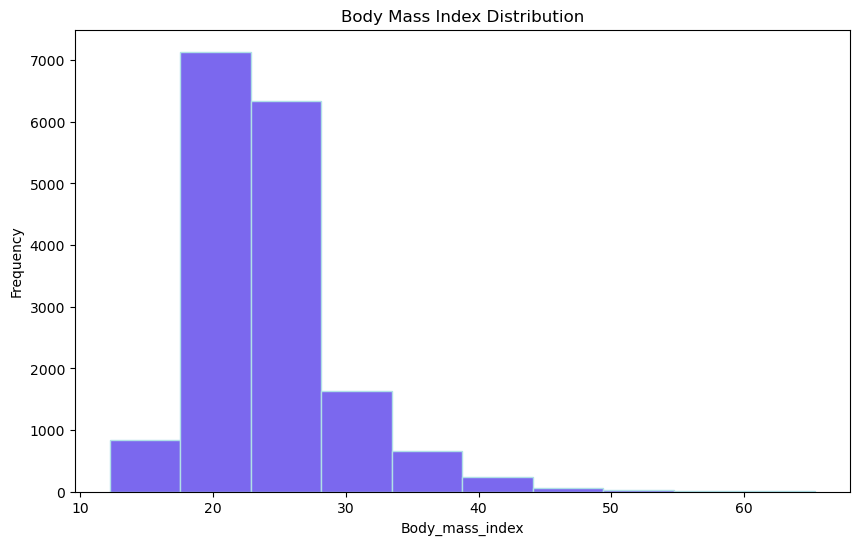

In [101]:
# Plotting histogram for BMI
plt.figure(figsize=(10, 6))
plt.hist(yrbs_survey_mapped_df_cleaned['Body_mass_index'], bins=10, edgecolor='powderblue',color='mediumslateblue')
plt.xlabel('Body_mass_index')
plt.ylabel('Frequency')
plt.title('Body Mass Index Distribution')
plt.show()


### Calculation of the BMI categories we have referred 
- https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [104]:
# Convert 'Body_mass_index' to numeric, setting errors='coerce' to turn non-numeric values into NaN
yrbs_survey_mapped_df_cleaned['Body_mass_index'] = pd.to_numeric(yrbs_survey_mapped_df_cleaned['Body_mass_index'], errors='coerce')

# Function to categorize BMI based on specified ranges
def categorize_body_mass_index(body_mass_index):
    if pd.isna(body_mass_index):  # Check if value is NaN
        return 'Skipped'  
    elif body_mass_index < 18.5:
        return 'Underweight'
    elif 18.5 <= body_mass_index < 25:
        return 'Healthy Weight'
    elif 25 <= body_mass_index < 30:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the categorization function to the 'Body_mass_index' column
yrbs_survey_mapped_df_cleaned['Body_mass_index_category'] = yrbs_survey_mapped_df_cleaned['Body_mass_index'].apply(categorize_body_mass_index)

# Display the result
print(yrbs_survey_mapped_df_cleaned[['Body_mass_index', 'Body_mass_index_category']].head(5))


   Body_mass_index Body_mass_index_category
0        28.524484               Overweight
1        23.850537           Healthy Weight
2        21.346021           Healthy Weight
3        19.699592           Healthy Weight
4        24.628809           Healthy Weight


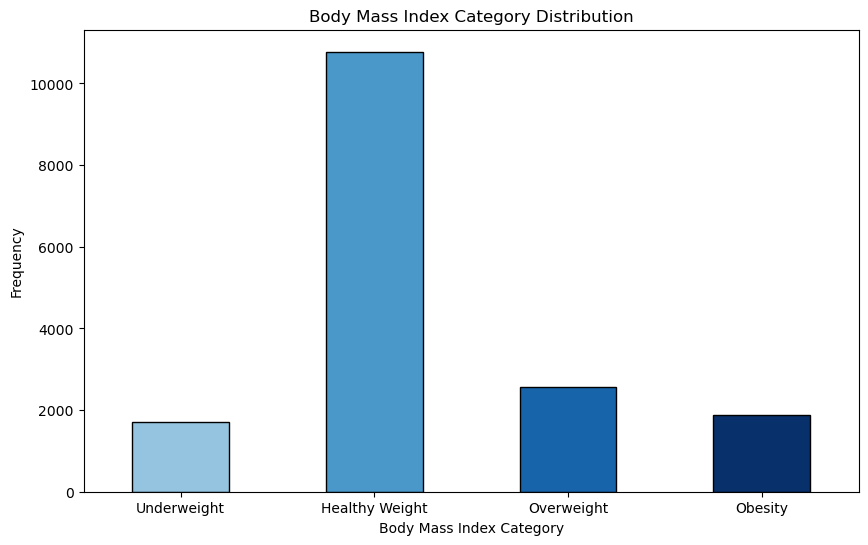

In [106]:
# Define the correct order for the categories
category_order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Generate different shades of blue using a colormap
cmap = cm.get_cmap('Blues')
custom_colors = cmap(np.linspace(0.4, 1, len(category_order)))  # Range for shades from lighter to darker blue

# Plotting bar plot for Body_mass_index_category with defined order and custom blue shades
plt.figure(figsize=(10, 6))
yrbs_survey_mapped_df_cleaned['Body_mass_index_category'].value_counts().reindex(category_order).plot(kind='bar', color=custom_colors, edgecolor='black')
plt.xlabel('Body Mass Index Category')
plt.ylabel('Frequency')
plt.title('Body Mass Index Category Distribution')
plt.xticks(rotation=0)
plt.show()

In [108]:
# Separating the data based on suicide risk
no_risk_group = yrbs_survey_mapped_df_cleaned[yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] == 'no']['Body_mass_index']
risk_group = yrbs_survey_mapped_df_cleaned[yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] =='yes']['Body_mass_index']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(no_risk_group, risk_group, equal_var=False)  

# Display the t-test result
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation based on p-value
if p_value < 0.05:
    print("The difference in Body mass index between suicide risk groups is statistically significant.")
else:
    print("The difference in Body mass index between suicide risk groups is not statistically significant.")

T-test statistic: -4.9743
P-value: 0.0000
The difference in Body mass index between suicide risk groups is statistically significant.


#### There is a statistically differnce between BMI and suicide

## Univariate analyses

### Distribution of seriously_considered_attempting_suicide_L12m (suicide risk) which is our target variable.
### More than 20% of teens have seriously considered suicide. Psychologists and communities can help tackle the problem.
- https://www.apa.org/monitor/2023/07/psychologists-preventing-teen-suicide

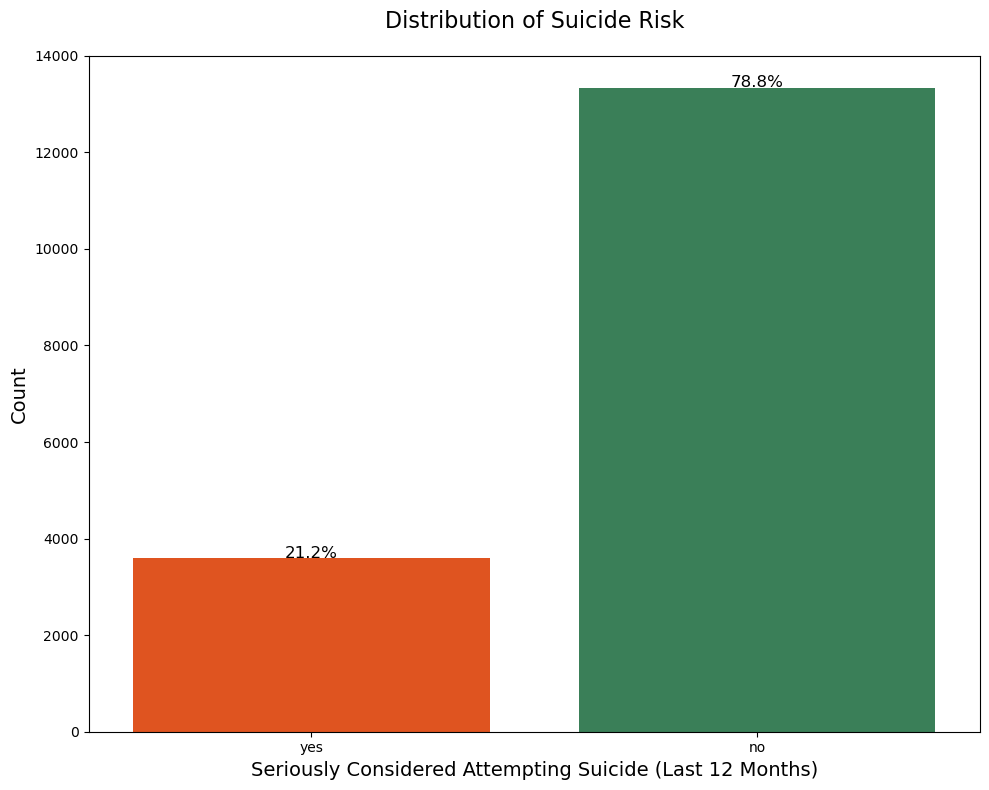

In [113]:
# Plotting target variable distribution
plt.figure(figsize=(10, 8))  # Increased figure size
sns.countplot(
    data=yrbs_survey_mapped_df_cleaned, 
    x='seriously_considered_attempting_suicide_L12m', 
    palette={'yes': 'orangered', 'no': 'seagreen'}
)

# Adding title and axis labels with improved styling
plt.title('Distribution of Suicide Risk', fontsize=16, pad=20)
plt.xlabel('Seriously Considered Attempting Suicide (Last 12 Months)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding percentage annotations above the bars
for p in plt.gca().patches:
    height = p.get_height()
    total = len(yrbs_survey_mapped_df_cleaned)
    percentage = f'{height / total:.1%}'
    plt.text(
        p.get_x() + p.get_width() / 2., 
        height + 10,  # Position just above the bar
        percentage, 
        ha='center', 
        fontsize=12, 
        color='black'
    )

# Displaying the plot
plt.tight_layout()
plt.show()

### Distribution of felt_sad_hopeless_L12m there is a supporting article that sadness is a common emotion sometimes caused by an event or loss.
- https://www.cdc.gov/howrightnow/emotion/sadness/index.html

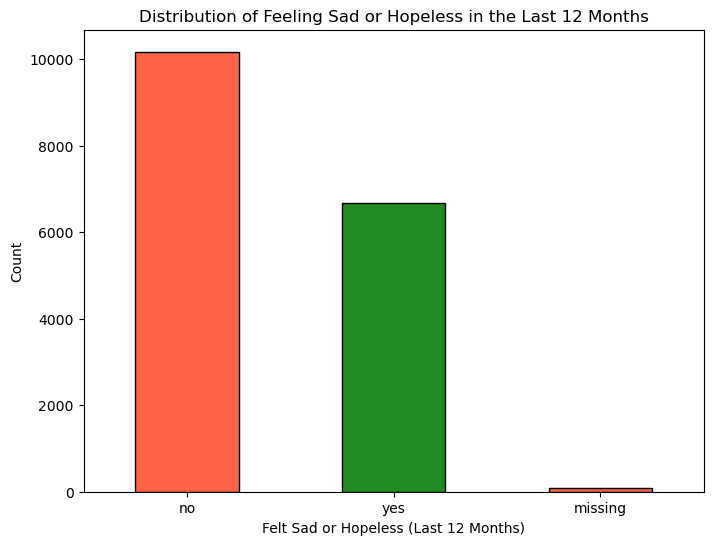

In [116]:
# Remove rows with missing values in the 'felt_sad_hopeless_L12m' column
yrbs_survey_mapped_df = yrbs_survey_mapped_df_cleaned.dropna(subset=['felt_sad_hopeless_L12m'])

# Plotting the distribution of 'felt_sad_hopeless_L12m' after removing missing values
plt.figure(figsize=(8, 6))
yrbs_survey_mapped_df_cleaned['felt_sad_hopeless_L12m'].value_counts().plot(kind='bar', color=['tomato', 'forestgreen'], edgecolor='black')
plt.xlabel('Felt Sad or Hopeless (Last 12 Months)')
plt.ylabel('Count')
plt.title('Distribution of Feeling Sad or Hopeless in the Last 12 Months')
plt.xticks(rotation=0)
plt.show()

### Distribution electronically bullied in last 12 months. According to pewresearch survey parents are concerened about the teens being bullied. 35% of U.S. parents with children younger than 18 say they are extremely or very worried that their children might be bullied at some point. 

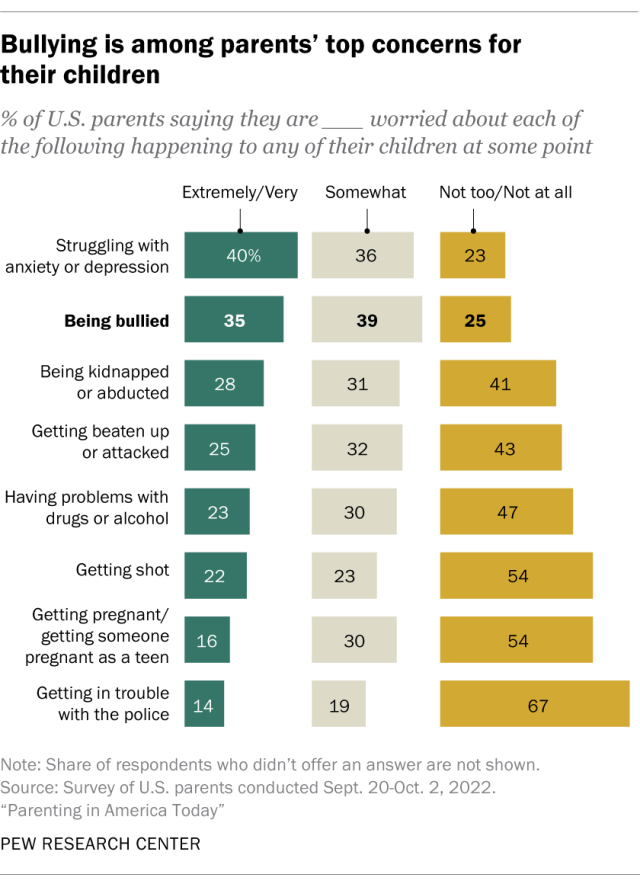

- https://www.brightpathbh.com/teenage-cyberbullying-statistics/#:~:text=According%20to%20the%202021%20Youth,in%20the%20last%2012%20months.
- https://nces.ed.gov/fastfacts/display.asp?id=719
- https://www.pewresearch.org/short-reads/2023/11/17/9-facts-about-bullying-in-the-us/

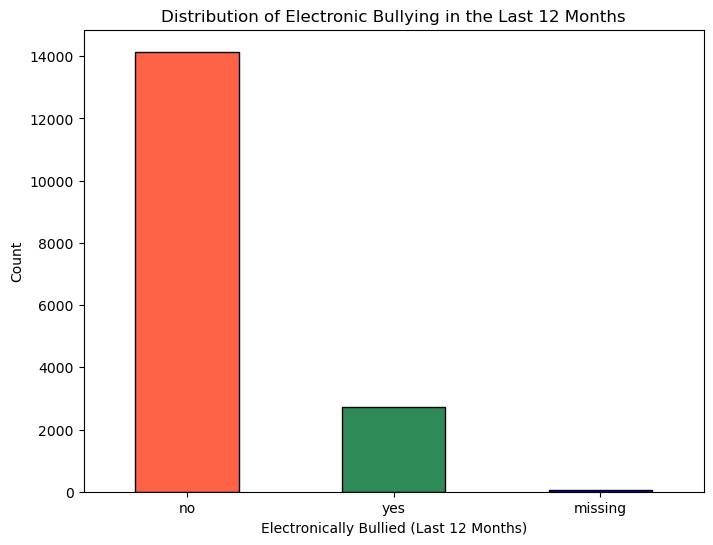

In [119]:
# Plotting the distribution of 'electronically_bullied_L12m'
plt.figure(figsize=(8, 6))
yrbs_survey_mapped_df_cleaned['electronically_bullied_L12m'].value_counts().plot(kind='bar', color=['tomato', 'seagreen','blue'], edgecolor='black')
plt.xlabel('Electronically Bullied (Last 12 Months)')
plt.ylabel('Count')
plt.title('Distribution of Electronic Bullying in the Last 12 Months')
plt.xticks(rotation=0)
plt.show()

### Even the mental health is a concern for us parents that can be seen in the above image
- https://www.pewresearch.org/short-reads/2023/11/17/9-facts-about-bullying-in-the-us/
- https://www.ncbi.nlm.nih.gov/books/NBK587174/

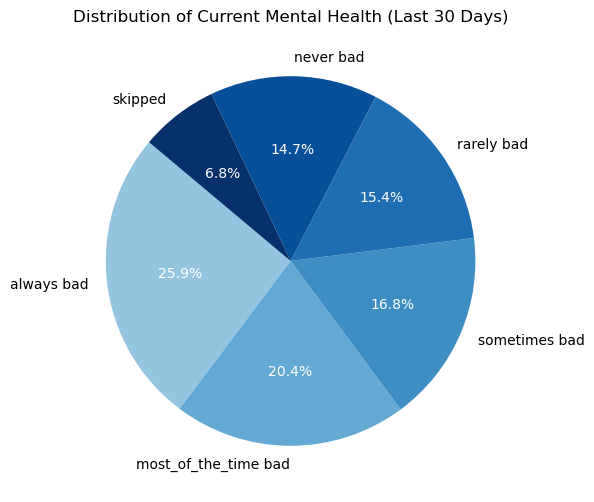

In [122]:
# Calculating value counts
values = yrbs_survey_mapped_df['current_mental_health_L30d'].value_counts().values

# Calculating percentages
percentages = values / values.sum() * 100

# Defining custom labels with percentages
custom_labels = [
    'always bad', 
    'most_of_the_time bad', 
    'sometimes bad', 
    'rarely bad', 
    'never bad', 
    'skipped'
]

# Using a colormap to create shades of blue
cmap = cm.get_cmap('Blues')  # Get the Blues colormap
colors = cmap(np.linspace(0.4, 1, len(values)))  # Generate a range of colors from light to dark blue

# Plotting Pie Chart with colors from cmap and custom labels
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    values, 
    labels=custom_labels, 
    startangle=140, 
    colors=colors, 
    autopct='%1.1f%%',  # Display percentages with 1 decimal place
    textprops={'color': 'black'}
)

# Setting percentage text color to white for better contrast
for autotext in autotexts:
    autotext.set_color('white')

plt.ylabel('')
plt.title('Distribution of Current Mental Health (Last 30 Days)')
plt.show()

In [124]:
print(list(yrbs_survey_mapped_df_cleaned.columns))

['height_m', 'weight_kg', 'HIV_testing', 'age', 'age_first_sexual_intercourse', 'alcohol_drugs_before_last_sex', 'birth_control_pill_use', 'bullied_at_school_L12m', 'concussion_L12m', 'condom_use', 'current_binge_drinking_L30d', 'current_marijuana_use_L30d', 'current_mental_health_L30d', 'current_sexual_activity_L3m', 'currently_drank_alcohol_L30d', 'drunk_driving_L30d', 'electronic_vapor_product_purchase_place_L30d', 'electronically_bullied_L12m', 'ever_had_sexual_intercourse', 'ever_injected_illegal_drugs', 'ever_tried_cigarette_smoking', 'ever_tried_cocaine', 'ever_tried_ecstacy', 'ever_tried_marijuana', 'ever_used_electronic_vapor_product', 'experienced_physical_dating_violence_L12m', 'experienced_sexual_dating_violence_L12m', 'experienced_sexual_violence_L12m', 'felt_sad_hopeless_L12m', 'first_tried_alcohol_age', 'first_tried_cigarette_smoking_age', 'first_tried_marijuana_age', 'forced_sexual_intercourse', 'gender', 'gender_sexual_contact', 'grade', 'gun_carrying_L12m', 'hispanic_

# Bivariate analyses
Since we have most of the variables are categorical we performed a goodness of fit using the chi-square test and Cramer's V
- https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/bivariate-analysis/
-  https://www.statstest.com/cramers-v-2/​
- https://www.jmp.com/en_us/statistics-knowledge-portal/chi-square-test.html​
- https://www.frontiersin.org/journals/psychiatry/articles/10.3389/fpsyt.2023.1172940/full

In [127]:
# Performing comprehensive bivariate analysis between a categorical independent variable and binary target variable (suicide risk)
def analyze_categorical_relationship(df, independent_var, target_var='seriously_considered_attempting_suicide_L12m',
                                  target_value='yes', title=None, figsize=(12, 6)):
    
    # Calculating overall risk rate (baseline)
    overall_rate = (df[target_var] == target_value).mean()
    
    # Calculate risk rates by variable values
    category_rates = df.groupby(independent_var)[target_var].apply(
        lambda x: (x == target_value).mean()
    ).reset_index()
    category_rates.columns = [independent_var, 'risk_rate']
    
    # Adding sample sizes
    category_sizes = df[independent_var].value_counts().reset_index()
    category_sizes.columns = [independent_var, 'sample_size']
    category_rates = category_rates.merge(category_sizes, on=independent_var)
    
    # Calculating relative risk (compared to overall)
    category_rates['relative_risk'] = category_rates['risk_rate'] / overall_rate
    category_rates['pct_difference'] = (category_rates['relative_risk'] - 1) * 100
    
    # Running chi-square test
    contingency_table = pd.crosstab(df[independent_var], df[target_var] == target_value)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))
    
    # Creating visualization
    plt.figure(figsize=figsize)
    
    # Bar plot
    ax = plt.gca()
    bars = plt.bar(category_rates[independent_var], category_rates['risk_rate'], 
                  alpha=0.6, color='skyblue')
    
    # Adding baseline reference line
    plt.axhline(y=overall_rate, color='red', linestyle='--', 
                label=f'Overall suicide risk: {overall_rate:.1%}')
    
    # Customizing plot
    plt.title(title or f'Suicide risk rate by {independent_var}\n' +
              f'Chi-square p-value: {p_value:.4f}, Cramer\'s V: {cramers_v:.3f}')
    plt.xlabel(independent_var)
    plt.ylabel('Seriously considered suicide in L12 months')
    
    # Adding value labels on bars
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        pct_diff = category_rates['pct_difference'].iloc[idx]
        sample_size = category_rates['sample_size'].iloc[idx]
        
        # Adding risk rate percentage
        plt.text(bar.get_x() + bar.get_width()/2, height - 0.01,
                f'{height:.1%}\n(n={sample_size:,})',
                ha='center', va='top')
        
        # Adding relative difference
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                f'{pct_diff:+.1f}%',
                ha='center', va='center',
                color='green' if pct_diff < 0 else 'red')
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) 
    
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Printing statistical analysis
    print("\nStatistical analysis:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Cramer's V: {cramers_v:.3f}")
    
    print("\nRisk rate analysis:")
    print(category_rates.to_string(index=False))
    
    # Interpretation
    print("\nInterpretation:")
    if p_value < 0.05:
        print(f"- There is a statistically significant relationship between {independent_var} "
              f"and suicide risk (p < 0.05)")
    else:
        print(f"- No statistically significant relationship detected between {independent_var} "
              f"and suicide risk (p >= 0.05)")
    
    print(f"- Effect size (Cramer's V): {get_cramers_v_interpretation(cramers_v)}")
    
    return {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'cramers_v': cramers_v,
        'category_rates': category_rates
    }

# Function to interpret Cramer's V effect size for strength association
def get_cramers_v_interpretation(v):
    if v < 0.1:
        return f"{v:.3f} - Negligible association"
    elif v < 0.2:
        return f"{v:.3f} - Weak association"
    elif v < 0.3:
        return f"{v:.3f} - Moderate association"
    else:
        return f"{v:.3f} - Strong association"


Statistical analysis:
Chi-square statistic: 708.57
p-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.205

Risk rate analysis:
 gender  risk_rate  sample_size  relative_risk  pct_difference
 female   0.291511         8010       1.373337       37.333708
   male   0.132580         8674       0.624599      -37.540112
missing   0.444444          243       2.093824      109.382441

Interpretation:
- There is a statistically significant relationship between gender and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.205 - Moderate association


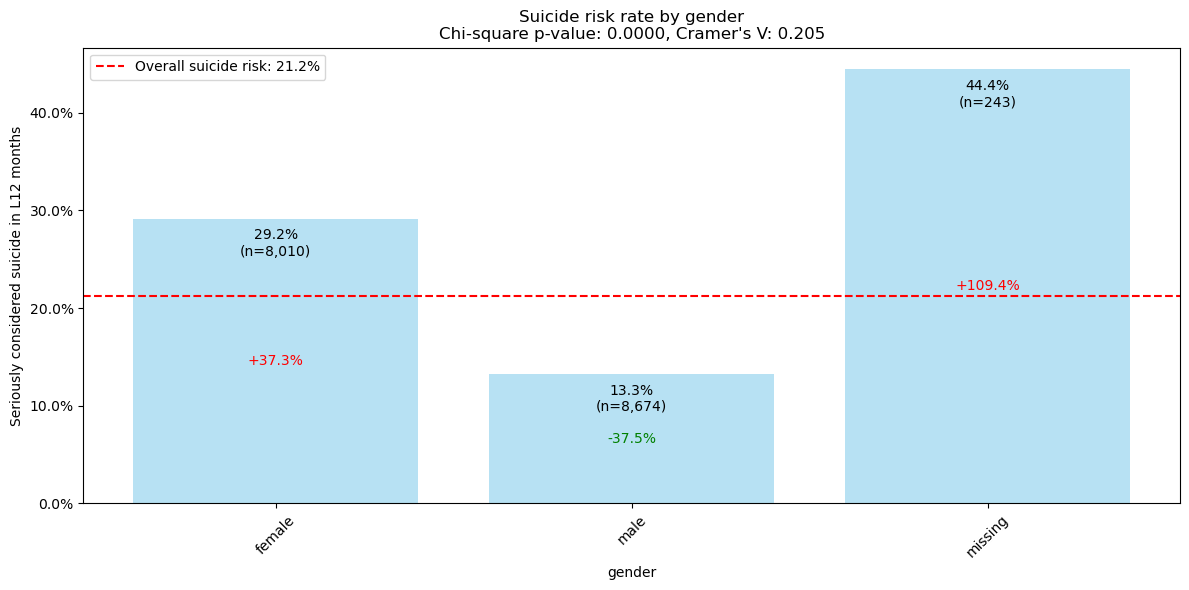

In [129]:
# Analyzing gender and interpreting association
results_gender = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'gender')

## We conclude that female are 2 times likely to commit suicide that male and there is a supporting article for our claim
- https://pmc.ncbi.nlm.nih.gov/articles/PMC6439147/


Statistical analysis:
Chi-square statistic: 1178.90
p-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.264

Risk rate analysis:
electronically_bullied_L12m  risk_rate  sample_size  relative_risk  pct_difference
                    missing   0.355556           45       1.675060       67.505953
                         no   0.164451        14144       0.774748      -22.525240
                        yes   0.456903         2738       2.152517      115.251726

Interpretation:
- There is a statistically significant relationship between electronically_bullied_L12m and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.264 - Moderate association


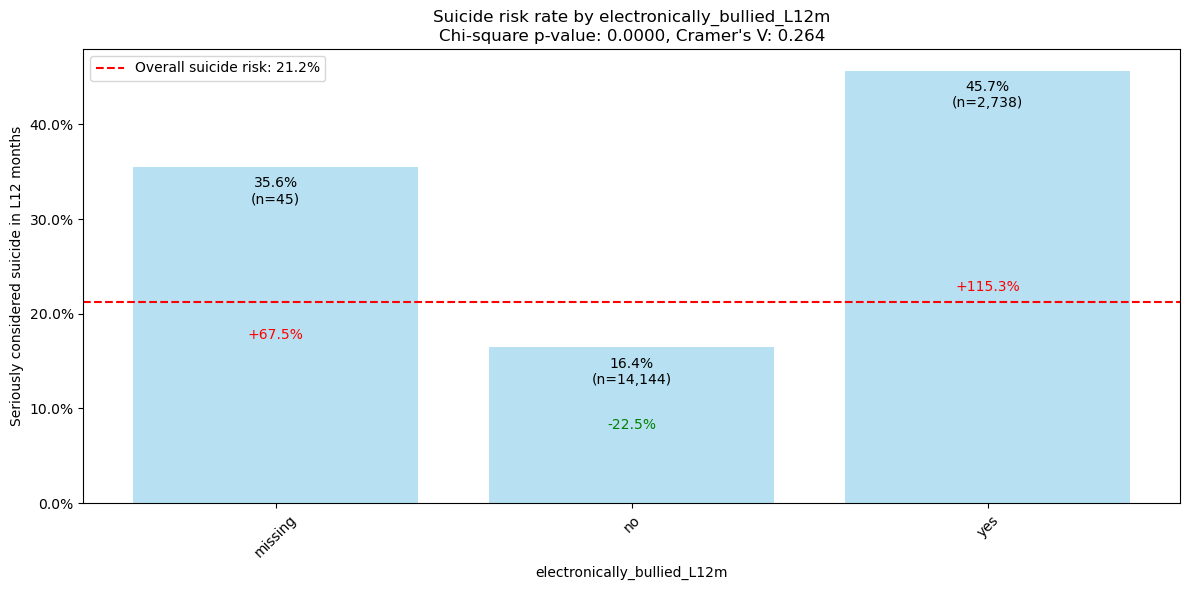

In [132]:
# Analyzing electronically bullied and interpreting association
results_ebullying = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'electronically_bullied_L12m')

### From the above relationship we can confirm that teens who are bullied online are twice as likely to consider or attempt suicide compared to teens who are not bullied online.
Research indicates that teens who experience bullying are at a significantly higher risk of suicidal thoughts compared to their non-bullied peers. A study published in BMC Psychiatry found that victims of cyberbullying are more than twice as likely to engage in suicidal behavior.
- https://bmcpsychiatry.biomedcentral.com/articles/10.1186/s12888-023-05268-9?


Statistical analysis:
Chi-square statistic: 16.41
p-value: 0.0009
Degrees of freedom: 3
Cramer's V: 0.031

Risk rate analysis:
Body_mass_index_category  risk_rate  sample_size  relative_risk  pct_difference
          Healthy Weight   0.203489        10777       0.958658       -4.134239
                 Obesity   0.240574         1883       1.133367       13.336725
              Overweight   0.222828         2567       1.049767        4.976705
             Underweight   0.220588         1700       1.039214        3.921432

Interpretation:
- There is a statistically significant relationship between Body_mass_index_category and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.031 - Negligible association


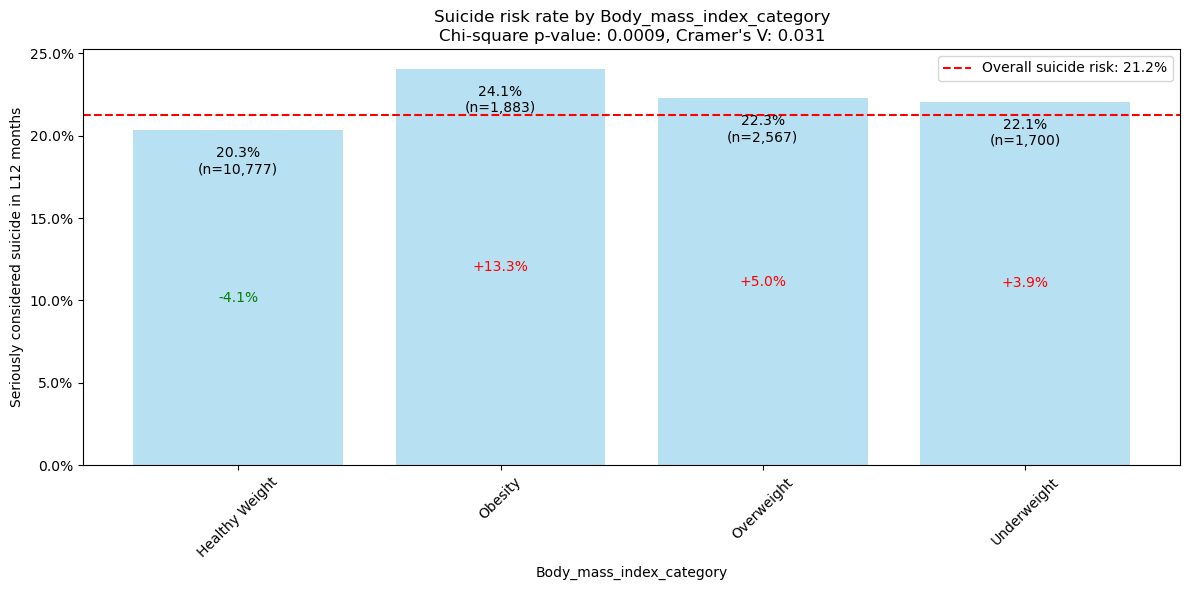

In [135]:
# Analyzing BMI category and interpreting association
results_bmi_cat = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'Body_mass_index_category')


Statistical analysis:
Chi-square statistic: 2842.77
p-value: 0.0000
Degrees of freedom: 5
Cramer's V: 0.410

Risk rate analysis:
current_mental_health_L30d  risk_rate  sample_size  relative_risk  pct_difference
                    always   0.639344         1159       3.012018      201.201790
                   missing   0.171350         4377       0.807249      -19.275104
          most_of_the_time   0.441532         2480       2.080105      108.010480
                     never   0.041769         2849       0.196778      -80.322166
                    rarely   0.085155         2607       0.401176      -59.882421
                 sometimes   0.192764         3455       0.908132       -9.186805

Interpretation:
- There is a statistically significant relationship between current_mental_health_L30d and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.410 - Strong association


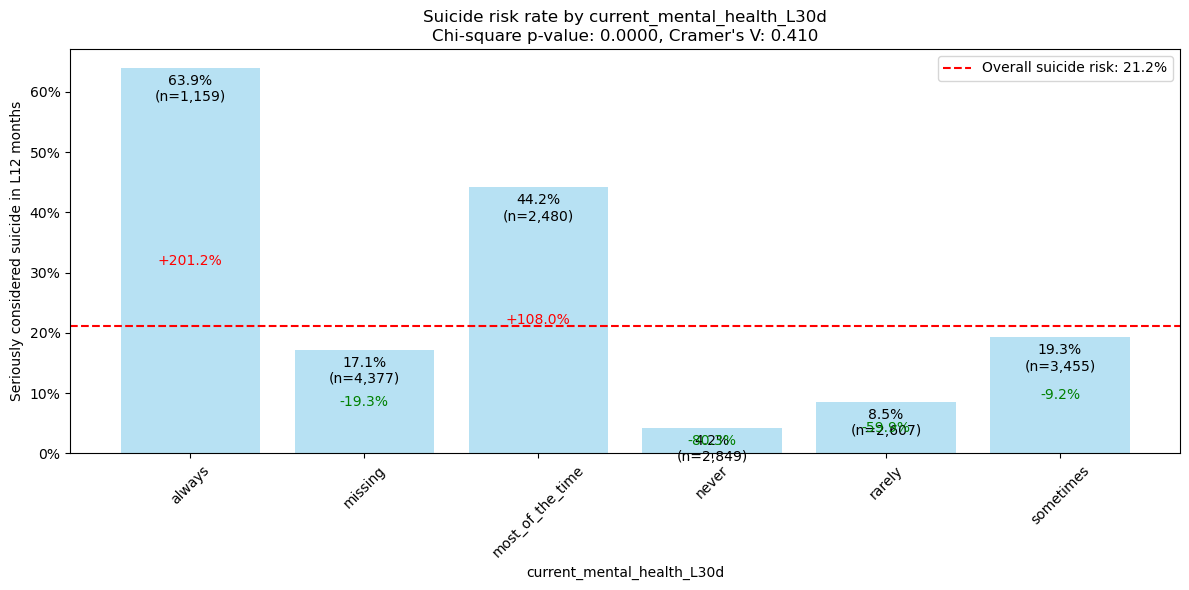

In [137]:
# Analyzing mental health and interpreting association
results_mh = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'current_mental_health_L30d')

### Teens who have somesort of mental health issue are more likely to commit suicide
Suicide risk significantly increases for individuals who report feeling "always" mentally unhealthy. ​
Respondents who "never" or "rarely" feel mentally unhealthy show a significantly lower suicide risk than the overall baseline.​
- https://www.cdc.gov/mmwr/volumes/73/su/su7304a3.htm


Statistical analysis:
Chi-square statistic: 897.12
p-value: 0.0000
Degrees of freedom: 1
Cramer's V: 0.230

Risk rate analysis:
Tobacco_products_use  risk_rate  sample_size  relative_risk  pct_difference
                  No   0.167619        13823       0.789672      -21.032843
                 Yes   0.411082         3104       1.936653       93.665267

Interpretation:
- There is a statistically significant relationship between Tobacco_products_use and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.230 - Moderate association


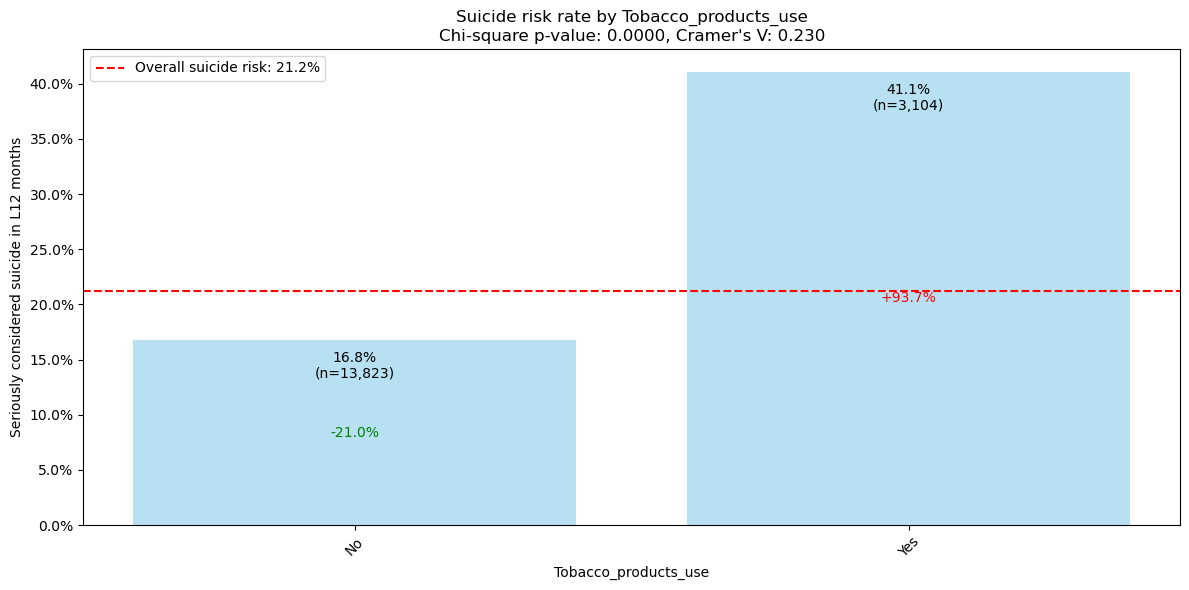

In [140]:
# Analyzing Tobacco products use and interpreting association
results_tobacco_products = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'Tobacco_products_use')

## Teens who consume or use some sort of tobaacco use are more likely to commit suicide
- https://www.healthychildren.org/English/health-issues/conditions/tobacco/Pages/Alternative-Forms-of-Tobacco.aspx
- https://portal.ct.gov/-/media/departments-and-agencies/dph/dph/hems/tobacco/tobaccoproductspdf.pdf


Statistical analysis:
Chi-square statistic: 939.85
p-value: 0.0000
Degrees of freedom: 7
Cramer's V: 0.236

Risk rate analysis:
ever_tried_marijuana  risk_rate  sample_size  relative_risk  pct_difference
             0_times   0.149474         9975       0.704186      -29.581379
   100_or_more_times   0.432596          994       2.038003      103.800314
      10_to_19_times   0.410926          421       1.935917       93.591723
        1_or_2_times   0.311816          914       1.468999       46.899880
      20_to_39_times   0.360465          344       1.698189       69.818899
        3_to_9_times   0.370044          681       1.743316       74.331636
      40_to_99_times   0.452381          336       2.131214      113.121413
             missing   0.210300         3262       0.990747       -0.925261

Interpretation:
- There is a statistically significant relationship between ever_tried_marijuana and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.236 - Moderate association


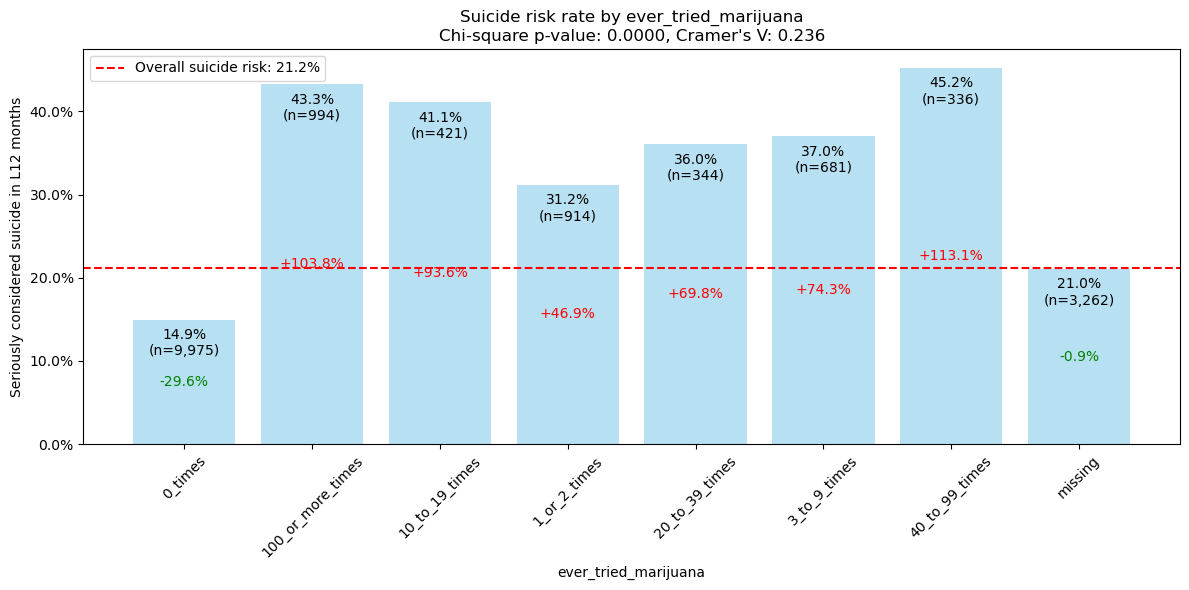

In [143]:
# Analyzing tried marijuana use and interpreting association
results_ever_tried_marijuana = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'ever_tried_marijuana')

### Teens were the 
- https://www.nih.gov/news-events/news-releases/cannabis-use-may-be-associated-suicidality-young-adults


Statistical analysis:
Chi-square statistic: 1339.76
p-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.281

Risk rate analysis:
forced_sexual_intercourse  risk_rate  sample_size  relative_risk  pct_difference
                  missing   0.218877         2956       1.031152        3.115186
                       no   0.172489        12795       0.812615      -18.738503
                      yes   0.628401         1176       2.960465      196.046475

Interpretation:
- There is a statistically significant relationship between forced_sexual_intercourse and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.281 - Moderate association


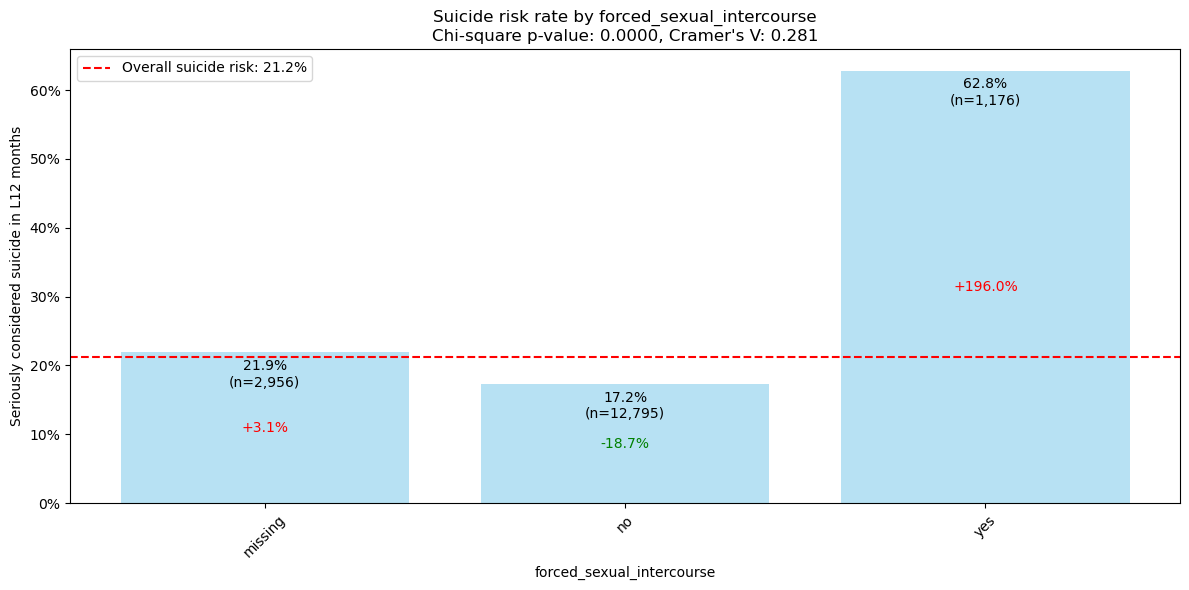

In [146]:
# Analyzing forced_sexual_intercourse and interpreting association
results_forced_sexual_intercourse = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'forced_sexual_intercourse')

### The results show that teens are three times likely to commit suicide among teens who experienced forced sexual intercourse compared to those who did not, indicating a strong correlation between such traumatic experiences and increased suicide risk.
- https://www.thetrevorproject.org/research-briefs/sexual-violence-and-suicide-risk-among-lgbtq-young-people/


Statistical analysis:
Chi-square statistic: 969.68
p-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.239

Risk rate analysis:
ever_used_electronic_vapor_product  risk_rate  sample_size  relative_risk  pct_difference
                           missing   0.235465          344       1.109301       10.930087
                                no   0.137704        10617       0.648736      -35.126350
                               yes   0.343614         5966       1.618801       61.880072

Interpretation:
- There is a statistically significant relationship between ever_used_electronic_vapor_product and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.239 - Moderate association


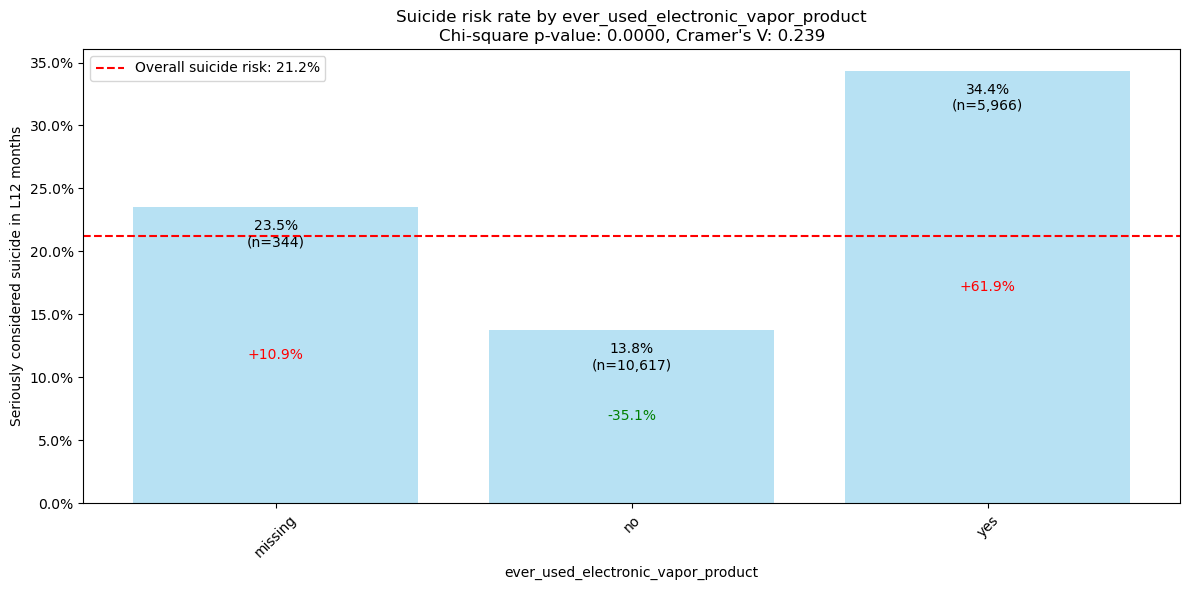

In [149]:
# Analyzing ever_used_electronic_vapor_product and interpreting association
results_ever_used_electronic_vapor_product = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'ever_used_electronic_vapor_product')

### Teens who use a lot of vapor products are more likely to commit suicide
- https://pmc.ncbi.nlm.nih.gov/articles/PMC11389297/#:~:text=Additionally%2C%20a%20study%20in%20the,Risk%20Behavior%20Survey%20%5B34%5D.


Statistical analysis:
Chi-square statistic: 116.47
p-value: 0.0000
Degrees of freedom: 5
Cramer's V: 0.083

Risk rate analysis:
gun_carrying_L12m  risk_rate  sample_size  relative_risk  pct_difference
           0_days   0.217941        12251       1.026745        2.674477
            1_day   0.358382          173       1.688373       68.837286
      2_or_3_days   0.357616          151       1.684766       68.476600
      4_or_5_days   0.290909           55       1.370503       37.050325
   6_or_more_days   0.392473          186       1.848982       84.898204
          missing   0.174653         4111       0.822810      -17.718965

Interpretation:
- There is a statistically significant relationship between gun_carrying_L12m and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.083 - Negligible association


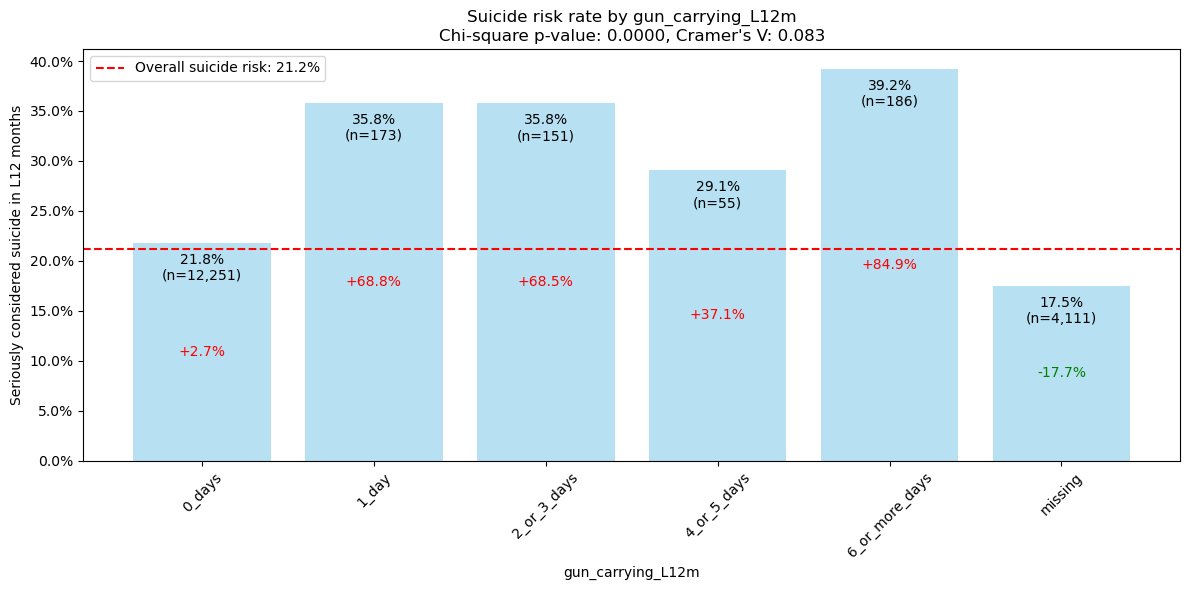

In [152]:
# Analyzing gun_carrying_L12m and interpreting association
results_gun_carrying_L12m = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'gun_carrying_L12m')

### Teens carrying guns show a strong correlation with increased suicide risk, highlighting the critical role of firearm access in suicidal behavior.
- https://www.thetrace.org/2023/12/firearm-suicide-gun-owners-nra-research/


Statistical analysis:
Chi-square statistic: 314.95
p-value: 0.0000
Degrees of freedom: 7
Cramer's V: 0.136

Risk rate analysis:
current_binge_drinking_L30d  risk_rate  sample_size  relative_risk  pct_difference
                     0_days   0.195789        10971       0.922382       -7.761796
              10_to_19_days   0.475410           61       2.239706      123.970562
                      1_day   0.397614          503       1.873203       87.320275
            20_or_more_days   0.491228           57       2.314227      131.422698
                     2_days   0.382263          327       1.800881       80.088109
                3_to_5_days   0.382166          314       1.800422       80.042226
                6_to_9_days   0.387597          129       1.826010       82.600966
                    missing   0.195619         4565       0.921581       -7.841912

Interpretation:
- There is a statistically significant relationship between current_binge_drinking_L30d and suicide risk (p

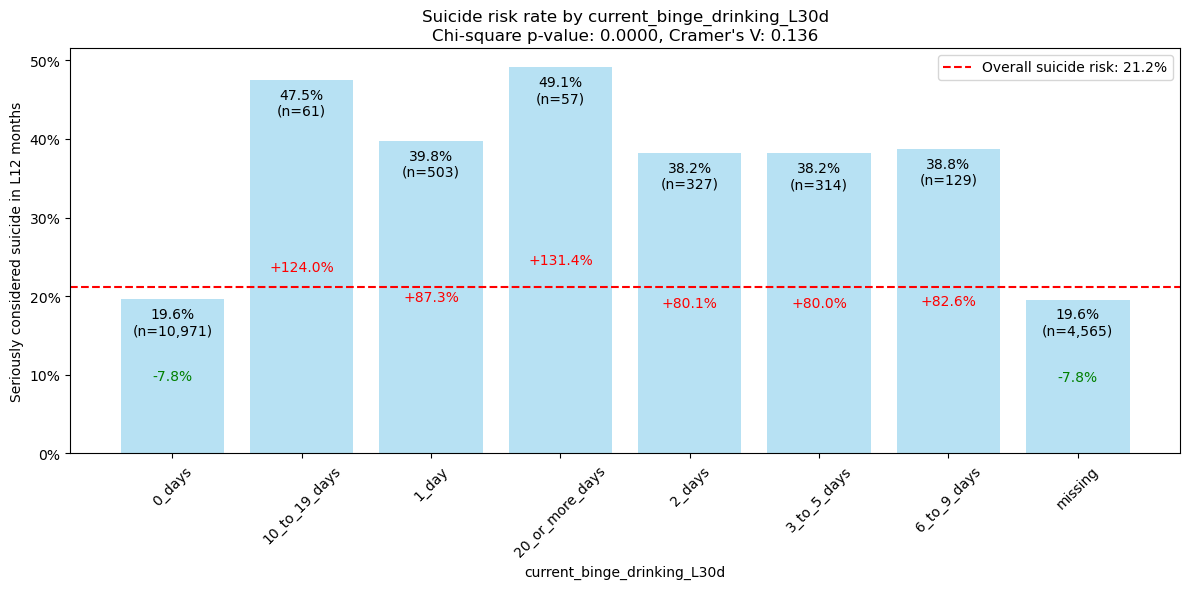

In [155]:
# Analyzing current_binge_drinking_L30d and interpreting association
results_current_binge_drinking_L30d = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'current_binge_drinking_L30d')

### Teens who drink on most days of the month are more prone to have suicide thoughts
- https://pmc.ncbi.nlm.nih.gov/articles/PMC8499040/#:~:text=In%20particular%2C%20the%20risk%20of,adjusted%20OR%3D2.060%2C%20p%3D



Statistical analysis:
Chi-square statistic: 4272.71
p-value: 0.0000
Degrees of freedom: 2
Cramer's V: 0.502

Risk rate analysis:
felt_sad_hopeless_L12m  risk_rate  sample_size  relative_risk  pct_difference
               missing   0.227848           79       1.073416        7.341631
                    no   0.045410        10174       0.213931      -78.606935
                   yes   0.466437         6674       2.197433      119.743327

Interpretation:
- There is a statistically significant relationship between felt_sad_hopeless_L12m and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.502 - Strong association


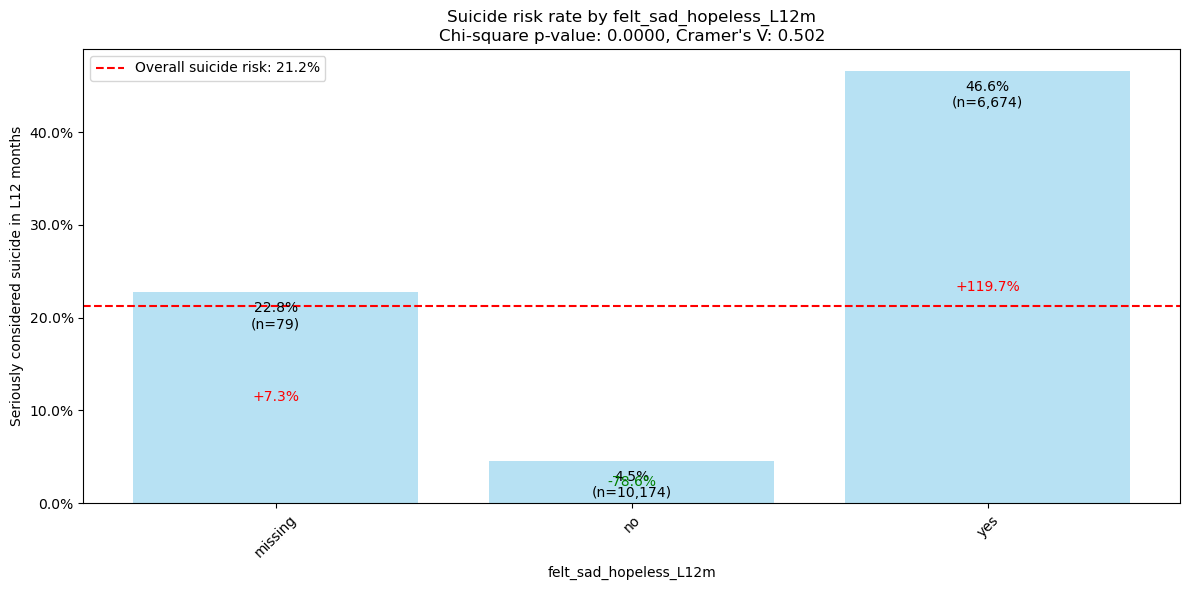

In [158]:
# Analyzing felt_sad_hopeless_L12m and interpreting association
results_felt_sad_hopeless_L12m = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'felt_sad_hopeless_L12m')

### There is an increase in suicide risk for those who reported feeling sad/hopeless compared to the overall baseline risk of 21.2%. 
Feeling sad and hopeless has a strong positive correlation with increased suicide risk, more than doubling the baseline risk rate. 
Many of the respondents were hesitant to disclose whether they felt sad or hopeless.
- https://www.nytimes.com/2023/02/13/health/teen-girls-sadness-suicide-violence.html


Statistical analysis:
Chi-square statistic: 213.19
p-value: 0.0000
Degrees of freedom: 5
Cramer's V: 0.112

Risk rate analysis:
weapon_carry_school_L30d  risk_rate  sample_size  relative_risk  pct_difference
                  0_days   0.219375        12098       1.033499        3.349913
                   1_day   0.348101          158       1.639942       63.994159
             2_or_3_days   0.516854           89       2.434953      143.495311
             4_or_5_days   0.607143           28       2.860314      186.031371
          6_or_more_days   0.475610          164       2.240647      124.064746
                 missing   0.169248         4390       0.797346      -20.265354

Interpretation:
- There is a statistically significant relationship between weapon_carry_school_L30d and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.112 - Weak association


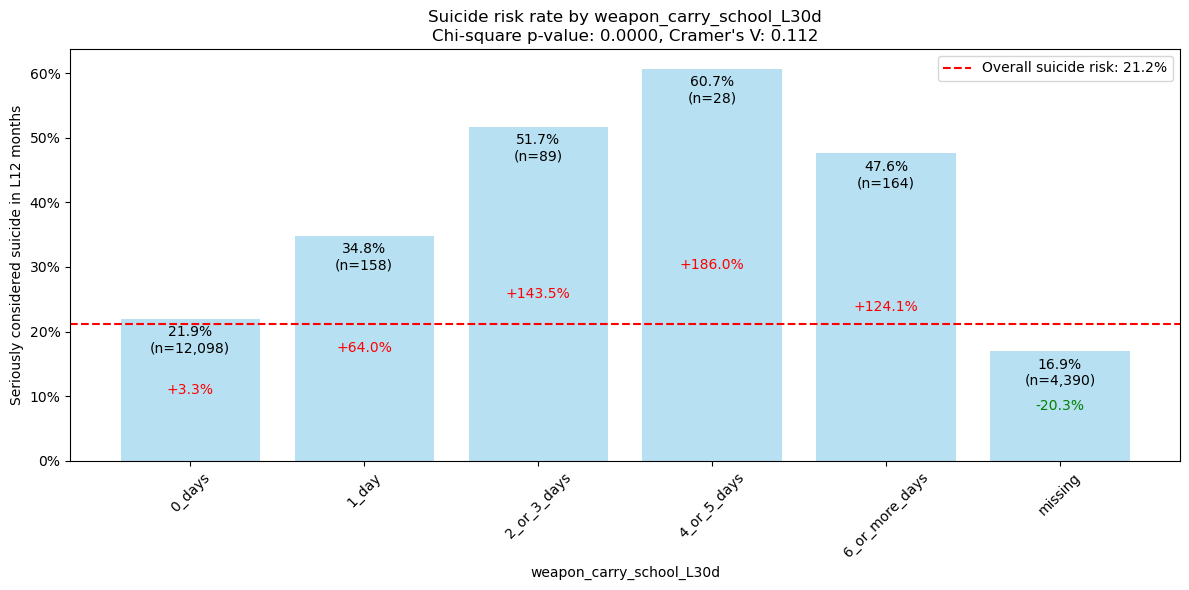

In [161]:
# Analyzing weapon_carry_school_L30d and interpreting association
results_weapon_carry_school_L30d = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'weapon_carry_school_L30d')

### This bivariate function was written for displaying the column "experienced_physical_dating_violence_L12m" as the labels are very large to display

In [164]:
# Function for bivariate analysis with improved x-axis labels using a mapping dictionary
def analyze_categorical_relationship_v1(df, independent_var, target_var='seriously_considered_attempting_suicide_L12m',
                                        target_value='yes', title=None, figsize=(12, 6)):
    # Mapping dictionary for better readability
    value_labels = {
        "0_times": "0 Times",
        "1_time": "1 Time",
        "2_or_3_times": "2 or 3 Times",
        "4_or_5_times": "4 or 5 Times",
        "6_or_more_times": "6 or More Times",
        "i_did_not_date_or_go_out_with_anyone_during_the_past_12_months": "Did Not Date in Past 12 Months",
        "missing": "Missing"
    }
    
    # Calculating overall risk rate (baseline)
    overall_rate = (df[target_var] == target_value).mean()

    # Calculate risk rates by variable values
    category_rates = df.groupby(independent_var)[target_var].apply(
        lambda x: (x == target_value).mean()
    ).reset_index()
    category_rates.columns = [independent_var, 'risk_rate']

    # Adding sample sizes
    category_sizes = df[independent_var].value_counts().reset_index()
    category_sizes.columns = [independent_var, 'sample_size']
    category_rates = category_rates.merge(category_sizes, on=independent_var)

    # Calculating relative risk (compared to overall)
    category_rates['relative_risk'] = category_rates['risk_rate'] / overall_rate
    category_rates['pct_difference'] = (category_rates['relative_risk'] - 1) * 100

    # Mapping x-axis labels using the dictionary
    category_rates[independent_var] = category_rates[independent_var].map(value_labels)

    # Running chi-square test
    contingency_table = pd.crosstab(df[independent_var], df[target_var] == target_value)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))

    # Creating visualization
    plt.figure(figsize=figsize)

    # Bar plot
    ax = plt.gca()
    bars = plt.bar(category_rates[independent_var], category_rates['risk_rate'], 
                   alpha=0.6, color='skyblue')

    # Adding baseline reference line
    plt.axhline(y=overall_rate, color='red', linestyle='--', 
                label=f'Overall suicide risk: {overall_rate:.1%}')

    # Customizing plot
    plt.title(title or f'Suicide risk rate by {independent_var}\n' +
              f'Chi-square p-value: {p_value:.4f}, Cramer\'s V: {cramers_v:.3f}')
    plt.xlabel(independent_var)
    plt.ylabel('Seriously considered suicide in L12 months')

    # Adding value labels on bars
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        pct_diff = category_rates['pct_difference'].iloc[idx]
        sample_size = category_rates['sample_size'].iloc[idx]

        # Adding risk rate percentage
        plt.text(bar.get_x() + bar.get_width() / 2, height - 0.01,
                 f'{height:.1%}\n(n={sample_size:,})',
                 ha='center', va='top')

        # Adding relative difference
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2,
                 f'{pct_diff:+.1f}%',
                 ha='center', va='center',
                 color='green' if pct_diff < 0 else 'red')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Adding a legend
    handles, labels = ax.get_legend_handles_labels()
    legend_labels = [f"{category_rates[independent_var][i]}: n={category_rates['sample_size'][i]}" for i in range(len(labels))]
    plt.legend(handles, legend_labels, loc='best')

    plt.xticks(rotation=45)
    plt.tight_layout()

    # Printing statistical analysis
    print("\nStatistical analysis:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Cramer's V: {cramers_v:.3f}")

    print("\nRisk rate analysis:")
    print(category_rates.to_string(index=False))

    # Interpretation
    print("\nInterpretation:")
    if p_value < 0.05:
        print(f"- There is a statistically significant relationship between {independent_var} "
              f"and suicide risk (p < 0.05)")
    else:
        print(f"- No statistically significant relationship detected between {independent_var} "
              f"and suicide risk (p >= 0.05)")

    print(f"- Effect size (Cramer's V): {get_cramers_v_interpretation(cramers_v)}")

    return {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'cramers_v': cramers_v,
        'category_rates': category_rates
    }

# Function to interpret Cramer's V effect size for strength association
def get_cramers_v_interpretation(v):
    if v < 0.1:
        return f"{v:.3f} - Negligible association"
    elif v < 0.2:
        return f"{v:.3f} - Weak association"
    elif v < 0.3:
        return f"{v:.3f} - Moderate association"
    else:
        return f"{v:.3f} - Strong association"



Statistical analysis:
Chi-square statistic: 737.05
p-value: 0.0000
Degrees of freedom: 6
Cramer's V: 0.209

Risk rate analysis:
experienced_physical_dating_violence_L12m  risk_rate  sample_size  relative_risk  pct_difference
                                  0 Times   0.216730         8942       1.021038        2.103795
                                   1 Time   0.498403          313       2.348027      134.802674
                             2 or 3 Times   0.594595          259       2.801198      180.119752
                             4 or 5 Times   0.697674           86       3.286817      228.681739
                          6 or More Times   0.591463          164       2.786446      178.644621
           Did Not Date in Past 12 Months   0.164186         6718       0.773496      -22.650361
                                  Missing   0.191011          445       0.899874      -10.012603

Interpretation:
- There is a statistically significant relationship between experienced_physic

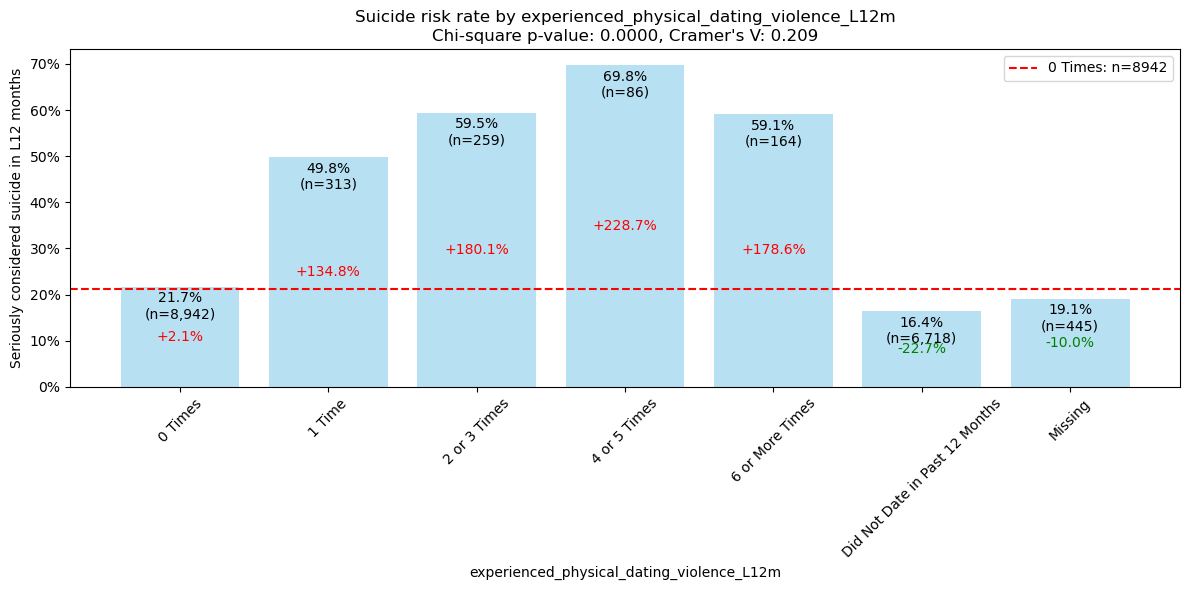

In [166]:
# Analyzing experienced_physical_dating_violence_L12m and interpreting association
results_experienced_physical_violence_L12m = analyze_categorical_relationship_v1(yrbs_survey_mapped_df_cleaned, 'experienced_physical_dating_violence_L12m')

### Teens who have dates atleast once or more have a high tendency for commiting suicide
- https://pubmed.ncbi.nlm.nih.gov/24006321/ 


Statistical analysis:
Chi-square statistic: 477.57
p-value: 0.0000
Degrees of freedom: 8
Cramer's V: 0.168

Risk rate analysis:
                  largest_number_of_drinks_L30d  risk_rate  sample_size  relative_risk  pct_difference
                              10_or_more_drinks   0.399417          343       1.881695       88.169497
                                  1_or_2_drinks   0.338014          997       1.592420       59.241962
                                       3_drinks   0.337209          172       1.588628       58.862841
                                       4_drinks   0.419214          229       1.974961       97.496102
                                       5_drinks   0.378840          293       1.784753       78.475306
                                  6_or_7_drinks   0.372308          325       1.753981       75.398060
                                  8_or_9_drinks   0.337580          157       1.590373       59.037300
i_did_not_drink_alcohol_during_the_past_30_days

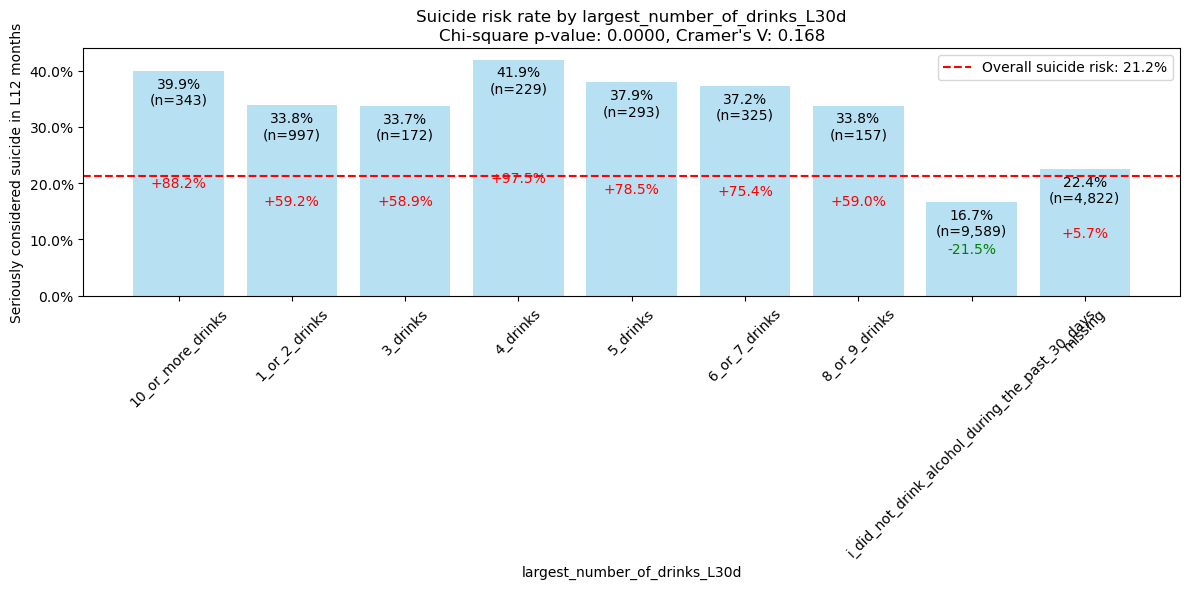

In [169]:
# Analyzing largest_number_of_drinks_L30d and interpreting association
results_largest_number_of_drinks_L30d = analyze_categorical_relationship(yrbs_survey_mapped_df_cleaned, 'largest_number_of_drinks_L30d')

### Bivariate method was customized for feature "sexual_identity" as the labes were large to display 

In [172]:
# Function for bivariate analysis with improved x-axis labels using a mapping dictionary
def analyze_categorical_relationship_v2(df, independent_var, target_var='seriously_considered_attempting_suicide_L12m',
                                        target_value='yes', title=None, figsize=(12, 6)):
    # Mapping dictionary for better readability
    value_labels = {
        "bisexual": "Bisexual",
        "gay_or_lesbian": "Gay or Lesbian",
        "heterosexual_(straight)": "Heterosexual (Straight)",
        "i_am_not_sure_about_my_sexual_identity_(questioning)": "Not Sure",
        "i_describe_my_sexual_identity_some_other_way": "Other",
        "i_do_not_know_what_this_question_is_asking": "Unclear Question",
        "missing": "Missing"
    }
    
    # Ensure the column is a string to avoid errors during plotting
    df[independent_var] = df[independent_var].astype(str)

    # Calculating overall risk rate (baseline)
    overall_rate = (df[target_var] == target_value).mean()

    # Calculate risk rates by variable values
    category_rates = df.groupby(independent_var)[target_var].apply(
        lambda x: (x == target_value).mean()
    ).reset_index()
    category_rates.columns = [independent_var, 'risk_rate']

    # Adding sample sizes
    category_sizes = df[independent_var].value_counts().reset_index()
    category_sizes.columns = [independent_var, 'sample_size']
    category_rates = category_rates.merge(category_sizes, on=independent_var)

    # Calculating relative risk (compared to overall)
    category_rates['relative_risk'] = category_rates['risk_rate'] / overall_rate
    category_rates['pct_difference'] = (category_rates['relative_risk'] - 1) * 100

    # Mapping x-axis labels using the dictionary
    category_rates[independent_var] = category_rates[independent_var].map(value_labels).fillna("Unknown")

    # Running chi-square test
    contingency_table = pd.crosstab(df[independent_var], df[target_var] == target_value)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))

    # Creating visualization
    plt.figure(figsize=figsize)

    # Bar plot
    ax = plt.gca()
    bars = plt.bar(category_rates[independent_var], category_rates['risk_rate'], 
                   alpha=0.6, color='skyblue')

    # Adding baseline reference line
    plt.axhline(y=overall_rate, color='red', linestyle='--')

    # Adding value labels on bars
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        pct_diff = category_rates['pct_difference'].iloc[idx]
        sample_size = category_rates['sample_size'].iloc[idx]

        # Adding risk rate percentage
        plt.text(bar.get_x() + bar.get_width() / 2, height - 0.01,
                 f'{height:.1%}\n(n={sample_size:,})',
                 ha='center', va='top')

        # Adding relative difference
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2,
                 f'{pct_diff:+.1f}%',
                 ha='center', va='center',
                 color='green' if pct_diff < 0 else 'red')

    # Customizing plot
    plt.title(title or f'Suicide risk rate by {independent_var}\n' +
              f'Chi-square p-value: {p_value:.4f}, Cramer\'s V: {cramers_v:.3f}')
    plt.xlabel(independent_var)
    plt.ylabel('Seriously considered suicide in L12 months (%)')
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Adding a legend with overall suicide rate
    plt.legend([f"Overall suicide risk: {overall_rate:.1%}"], loc='best')

    plt.tight_layout()

    # Printing statistical analysis
    print("\nStatistical analysis:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Cramer's V: {cramers_v:.3f}")

    print("\nRisk rate analysis:")
    print(category_rates.to_string(index=False))

    # Interpretation
    print("\nInterpretation:")
    if p_value < 0.05:
        print(f"- There is a statistically significant relationship between {independent_var} "
              f"and suicide risk (p < 0.05)")
    else:
        print(f"- No statistically significant relationship detected between {independent_var} "
              f"and suicide risk (p >= 0.05)")

    print(f"- Effect size (Cramer's V): {get_cramers_v_interpretation(cramers_v)}")

    return {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'cramers_v': cramers_v,
        'category_rates': category_rates
    }

# Function to interpret Cramer's V effect size for strength association
def get_cramers_v_interpretation(v):
    if v < 0.1:
        return f"{v:.3f} - Negligible association"
    elif v < 0.2:
        return f"{v:.3f} - Weak association"
    elif v < 0.3:
        return f"{v:.3f} - Moderate association"
    else:
        return f"{v:.3f} - Strong association"



Statistical analysis:
Chi-square statistic: 1762.89
p-value: 0.0000
Degrees of freedom: 6
Cramer's V: 0.323

Risk rate analysis:
        sexual_identity  risk_rate  sample_size  relative_risk  pct_difference
               Bisexual   0.501107         1806       2.360770      136.076963
         Gay or Lesbian   0.420118          507       1.979222       97.922160
Heterosexual (Straight)   0.141318        12249       0.665762      -33.423768
               Not Sure   0.353598          806       1.665837       66.583735
                  Other   0.465732          642       2.194113      119.411273
       Unclear Question   0.113497          326       0.534696      -46.530404
                Missing   0.208122          591       0.980484       -1.951623

Interpretation:
- There is a statistically significant relationship between sexual_identity and suicide risk (p < 0.05)
- Effect size (Cramer's V): 0.323 - Strong association


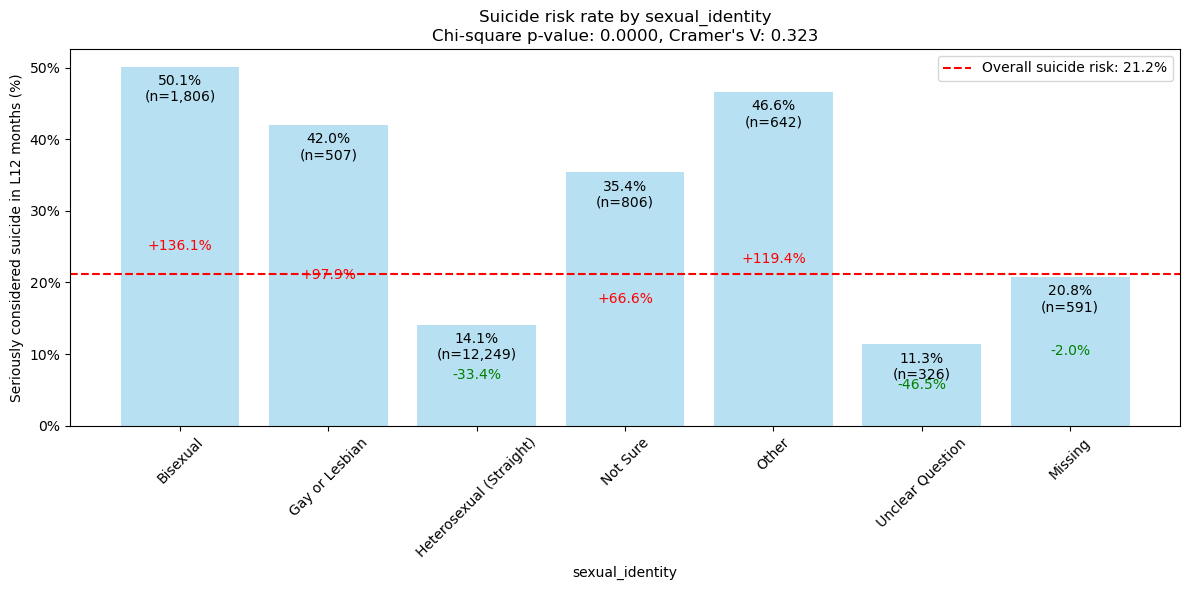

In [174]:
# Analyzing sexual_identity and interpreting association
results_sexual_identity = analyze_categorical_relationship_v2(yrbs_survey_mapped_df_cleaned, 'sexual_identity')

### Bisexual individuals showing the highest risk, followed by gay or lesbian individuals.​
### There is a clear disparity between heterosexual (straight) individuals who show the lowest risk compared to other sexual identity groups.
- https://www.thetrevorproject.org/blog/new-yrbs-data-emphasizes-severe-suicide-risk-disparities-faced-by-queer-students-compared-to-straight-peers/

### Display of the dataframe after the bivariate analysis

In [178]:
yrbs_survey_mapped_df_cleaned.head()

,height_m,weight_kg,HIV_testing,age,age_first_sexual_intercourse,alcohol_drugs_before_last_sex,birth_control_pill_use,bullied_at_school_L12m,concussion_L12m,condom_use,...,soda_drinking_L7d,sports_team_participation_L12m,texting_driving_L30d,tried_quitting_all_tobacco_products_L12m,water_consumption_L7d,weapon_carry_school_L30d,Tobacco_products_use,race_ethnicity_encoded,Body_mass_index,Body_mass_index_category
0,1.570000,70.310000,yes,16_years_old,i_have_never_had_sexual_intercourse,i_have_never_had_sexual_intercourse,i_have_never_had_sexual_intercourse_with_an_op...,yes,1_time,i_have_never_had_sexual_intercourse,...,i_did_not_drink_soda_or_pop_during_the_past_7_...,2_teams,i_did_not_drive_a_car_or_other_vehicle_during_...,no,4_to_6_times_during_the_past_7_days,0_days,No,NaN,28.524484,Overweight
1,1.694983,68.521841,no,15_years_old,15_years_old,yes,withdrawal_or_some_other_method,no,0_times,no,...,4_to_6_times_during_the_past_7_days,0_teams,i_did_not_drive_a_car_or_other_vehicle_during_...,no,3_times_per_day,0_days,Yes,NaN,23.850537,Healthy Weight
2,1.700000,61.690000,yes,15_years_old,i_have_never_had_sexual_intercourse,i_have_never_had_sexual_intercourse,missing,no,0_times,i_have_never_had_sexual_intercourse,...,4_to_6_times_during_the_past_7_days,0_teams,i_did_not_drive_a_car_or_other_vehicle_during_...,"i_did_not_use_cigarettes,_electronic_vapor_pro...",2_times_per_day,0_days,No,NaN,21.346021,Healthy Weight
3,1.750000,60.330000,no,15_years_old,12_years_old,no,withdrawal_or_some_other_method,no,0_times,yes,...,1_to_3_times_during_the_past_7_days,0_teams,0_days,yes,4_or_more_times_per_day,0_days,No,NaN,19.699592,Healthy Weight
4,1.900000,88.910000,not_sure,14_years_old,i_have_never_had_sexual_intercourse,i_have_never_had_sexual_intercourse,i_have_never_had_sexual_intercourse_with_an_op...,no,0_times,i_have_never_had_sexual_intercourse,...,4_to_6_times_during_the_past_7_days,0_teams,i_did_not_drive_a_car_or_other_vehicle_during_...,"i_did_not_use_cigarettes,_electronic_vapor_pro...",4_or_more_times_per_day,0_days,No,NaN,24.628809,Healthy Weight


# Modeling

### Since our project is a binary classification problem. So we have random forest, XGBoost, Logistic Regression, and Naive Bayes models for our project.
- https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/
- https://www.datacamp.com/tutorial/xgboost-in-python
- https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
- https://arxiv.org/abs/1603.02754
- https://medium.com/@sachinsoni600517/na%C3%AFve-bayes-machine-learning-algorithm-from-basic-to-advanced-91a8fb749ee3 

In [181]:
# Mapping "yes" to 1 and "no" to 0 in the target column
yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'] = yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m'].map({'yes': 1, 'no': 0})

# Identifying non-numeric columns for encoding
non_numeric_columns = yrbs_survey_mapped_df_cleaned.select_dtypes(include=['object']).columns

# Applying one-hot encoding using get_dummies on non-numeric columns
yrbs_survey_mapped_df_cleaned = pd.get_dummies(yrbs_survey_mapped_df_cleaned, columns=non_numeric_columns, drop_first=True)

# Verifying the transformation
print("Data after mapping and encoding:")
print(yrbs_survey_mapped_df_cleaned.head())

Data after mapping and encoding:
   height_m  weight_kg  seriously_considered_attempting_suicide_L12m  \
0  1.570000  70.310000                                             1   
1  1.694983  68.521841                                             0   
2  1.700000  61.690000                                             1   
3  1.750000  60.330000                                             0   
4  1.900000  88.910000                                             0   

   Body_mass_index  HIV_testing_no  HIV_testing_not_sure  HIV_testing_yes  \
0        28.524484           False                 False             True   
1        23.850537            True                 False            False   
2        21.346021           False                 False             True   
3        19.699592            True                 False            False   
4        24.628809           False                  True            False   

   age_13_years_old  age_14_years_old  age_15_years_old  ...  \
0      

In [183]:
yrbs_survey_mapped_df_cleaned.isnull().sum()

height_m                                        0
weight_kg                                       0
seriously_considered_attempting_suicide_L12m    0
Body_mass_index                                 0
HIV_testing_no                                  0
                                               ..
weapon_carry_school_L30d_missing                0
Tobacco_products_use_Yes                        0
Body_mass_index_category_Obesity                0
Body_mass_index_category_Overweight             0
Body_mass_index_category_Underweight            0
Length: 301, dtype: int64

In [185]:
yrbs_survey_mapped_df_cleaned.head(3)

,height_m,weight_kg,seriously_considered_attempting_suicide_L12m,Body_mass_index,HIV_testing_no,HIV_testing_not_sure,HIV_testing_yes,age_13_years_old,age_14_years_old,age_15_years_old,...,water_consumption_L7d_missing,weapon_carry_school_L30d_1_day,weapon_carry_school_L30d_2_or_3_days,weapon_carry_school_L30d_4_or_5_days,weapon_carry_school_L30d_6_or_more_days,weapon_carry_school_L30d_missing,Tobacco_products_use_Yes,Body_mass_index_category_Obesity,Body_mass_index_category_Overweight,Body_mass_index_category_Underweight
0,1.570000,70.310000,1,28.524484,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1.694983,68.521841,0,23.850537,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,1.700000,61.690000,1,21.346021,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [187]:
yrbs_survey_mapped_df_cleaned.shape

(16927, 301)

In [189]:
yrbs_survey_mapped_df_cleaned.columns

Index(['height_m', 'weight_kg', 'seriously_considered_attempting_suicide_L12m',
       'Body_mass_index', 'HIV_testing_no', 'HIV_testing_not_sure',
       'HIV_testing_yes', 'age_13_years_old', 'age_14_years_old',
       'age_15_years_old',
       ...
       'water_consumption_L7d_missing', 'weapon_carry_school_L30d_1_day',
       'weapon_carry_school_L30d_2_or_3_days',
       'weapon_carry_school_L30d_4_or_5_days',
       'weapon_carry_school_L30d_6_or_more_days',
       'weapon_carry_school_L30d_missing', 'Tobacco_products_use_Yes',
       'Body_mass_index_category_Obesity',
       'Body_mass_index_category_Overweight',
       'Body_mass_index_category_Underweight'],
      dtype='object', length=301)

In [191]:
# Converting all True/False values to 1 and 0
yrbs_survey_mapped_df_cleaned = yrbs_survey_mapped_df_cleaned.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Verify the conversion
print("Data after converting True/False values to 1/0:")
print(yrbs_survey_mapped_df_cleaned.head())

Data after converting True/False values to 1/0:
   height_m  weight_kg  seriously_considered_attempting_suicide_L12m  \
0  1.570000  70.310000                                             1   
1  1.694983  68.521841                                             0   
2  1.700000  61.690000                                             1   
3  1.750000  60.330000                                             0   
4  1.900000  88.910000                                             0   

   Body_mass_index  HIV_testing_no  HIV_testing_not_sure  HIV_testing_yes  \
0        28.524484               0                     0                1   
1        23.850537               1                     0                0   
2        21.346021               0                     0                1   
3        19.699592               1                     0                0   
4        24.628809               0                     1                0   

   age_13_years_old  age_14_years_old  age_15_years_old 

### We perfomed min max scaling on the feature 
### Split the dataset into 80% train, 10% test and 10% validation for modeling
- https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [194]:
# Define the feature matrix X and target variable y
X = yrbs_survey_mapped_df_cleaned.drop(columns=['seriously_considered_attempting_suicide_L12m'])
y = yrbs_survey_mapped_df_cleaned['seriously_considered_attempting_suicide_L12m']

# First split: 80% training data, 20% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)

# Second split: 10% test data, 10% validation data from the temporary data
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print("Data split completed.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Data split completed.
Training set size: 13541
Test set size: 1693
Validation set size: 1693


In [196]:
from sklearn.preprocessing import MinMaxScaler

# Defining the columns to scale
columns_to_scale = ['height_m', 'weight_kg']

# Initializing the scaler
scaler = MinMaxScaler()

# Scaling the training, test, and validation sets individually for height and weight only
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])

print("Min-Max Scaling applied to height and weight.")

Min-Max Scaling applied to height and weight.


In [198]:
# Displaying columns that are non-numeric
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

yrbs_survey_mapped_df.info()

Non-numeric columns: Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 16927 entries, 0 to 17231
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   height_m                                      16927 non-null  float64
 1   weight_kg                                     16927 non-null  float64
 2   HIV_testing                                   16927 non-null  object 
 3   age                                           16927 non-null  object 
 4   age_first_sexual_intercourse                  16927 non-null  object 
 5   alcohol_drugs_before_last_sex                 16927 non-null  object 
 6   birth_control_pill_use                        16927 non-null  object 
 7   bullied_at_school_L12m                        16927 non-null  object 
 8   concussion_L12m                               16927 non-null  object 
 9   condom_use         

### Tree based models perform better for classification problem 
- https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f

## Random Forest

In [202]:
# Step 1: Initialize and train the Random Forest model on the training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)


Top 10 most important features:
                                         feature  importance
137                   felt_sad_hopeless_L12m_yes    0.068604
136                    felt_sad_hopeless_L12m_no    0.068506
2                                Body_mass_index    0.030427
1                                      weight_kg    0.028318
243      sexual_identity_heterosexual_(straight)    0.024160
0                                       height_m    0.023184
90               electronically_bullied_L12m_yes    0.014144
56   current_mental_health_L30d_most_of_the_time    0.014110
160                forced_sexual_intercourse_yes    0.012604
161                                  gender_male    0.011385


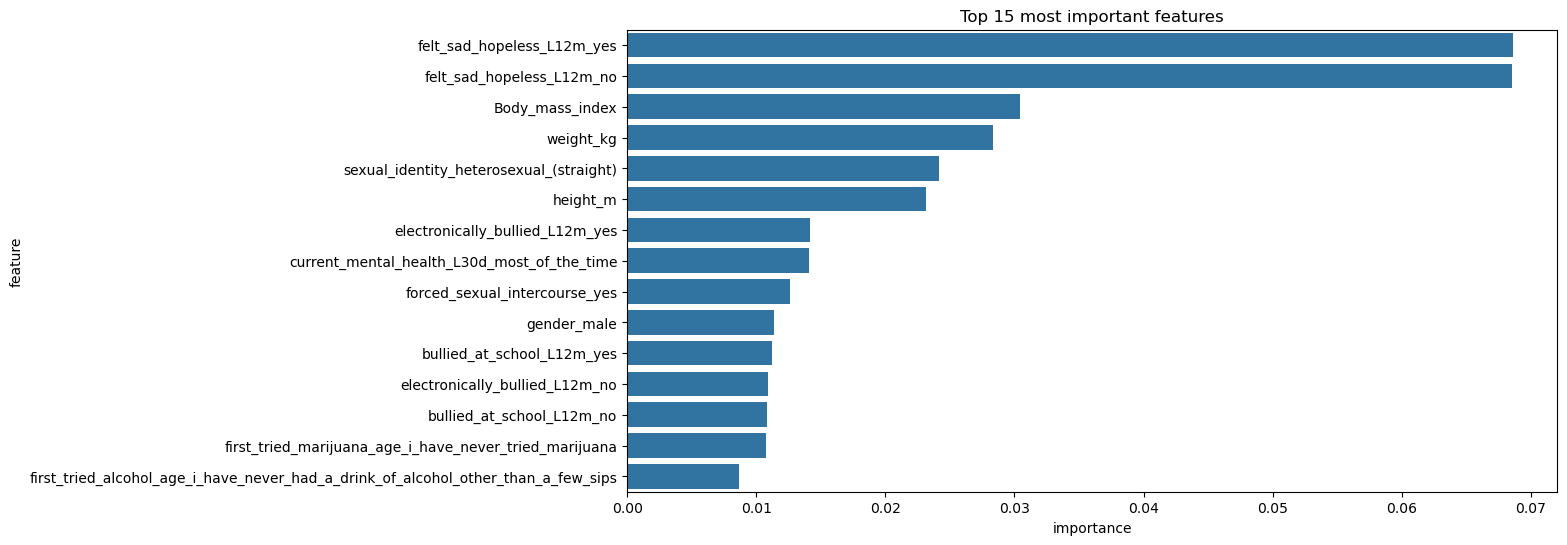

In [203]:
feature_cols = X_train.columns 

# Getting feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 most important features')
plt.show()

In [206]:
# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [208]:
# Printing evaluation metrics for RF model
print("Accuracy for Random Forest model:", accuracy_score(y_test, y_pred_rf))
print("Precision for Random Forest model:", precision_score(y_test, y_pred_rf))
print("Recall for Random Forest model:", recall_score(y_test, y_pred_rf))
print("F1 score for Random Forest model:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest model:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest model:\n", classification_report(y_test, y_pred_rf))

# Calculating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

Accuracy for Random Forest model: 0.8381571175428234
Precision for Random Forest model: 0.7222222222222222
Recall for Random Forest model: 0.4470899470899471
F1 score for Random Forest model: 0.5522875816993464

Confusion Matrix for Random Forest model:
 [[1250   65]
 [ 209  169]]

Classification Report for Random Forest model:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1315
           1       0.72      0.45      0.55       378

    accuracy                           0.84      1693
   macro avg       0.79      0.70      0.73      1693
weighted avg       0.83      0.84      0.82      1693



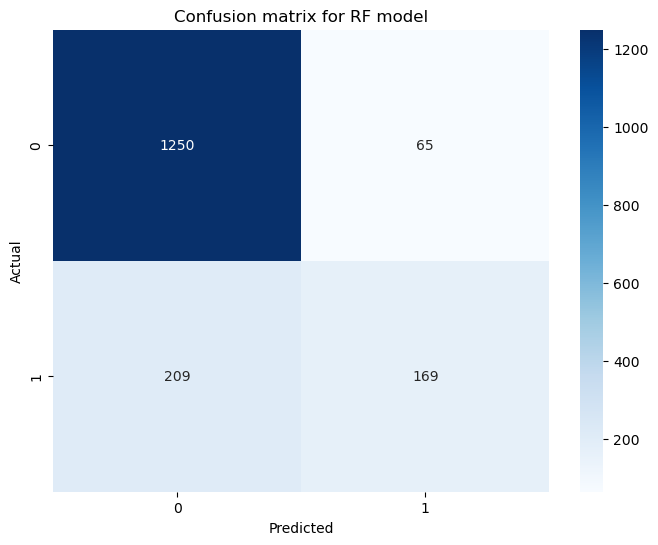

In [210]:
# Plotting heatmap for the confusion matrix of RF model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for RF model')
plt.show()


AUC for Random Forest model: 0.8866889975254995


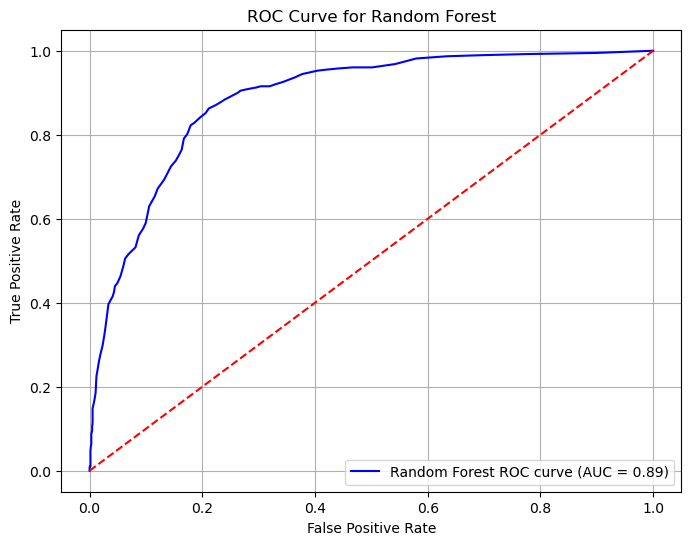

In [212]:
# Predict probabilities for the test set
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print AUC score
print("\nAUC for Random Forest model:", roc_auc_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"Random Forest ROC curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [214]:
# Getting probabilities for risk categorization
y_prob = rf_model.predict_proba(X_test)[:, 1]  # probability of class 1

# Defining risk categories
def get_risk_category(prob):
    if prob >= 0.8:
        return 'Very high risk'
    elif prob >= 0.6:
        return 'High risk'
    elif prob >= 0.4:
        return 'Moderate risk'
    elif prob >= 0.2:
        return 'Low risk'
    else:
        return 'No risk'

# Applying risk categorization
risk_categories = pd.Series(y_prob).map(get_risk_category)

# Getting risk category distribution
risk_distribution = risk_categories.value_counts()
risk_distribution

No risk           987
Low risk          293
Moderate risk     281
High risk         119
Very high risk     13
Name: count, dtype: int64

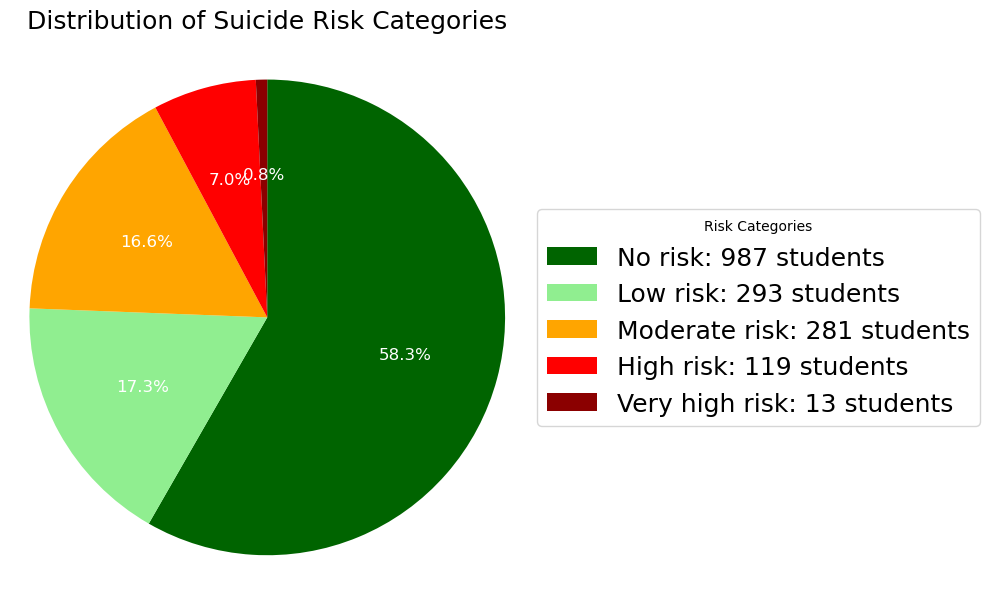

In [216]:
import matplotlib.pyplot as plt

# Color map for each risk category
color_map = {
    'Very high risk': '#8B0000',  # dark red
    'High risk': '#FF0000',       # red
    'Moderate risk': '#FFA500',   # orange
    'Low risk': '#90EE90',        # light green
    'No risk': '#006400'          # dark green
}

# Function to create pie chart of risk category distribution
def plot_risk_distribution(risk_distribution, figsize=(10, 6)):
    # Define colors for each risk category
    colors = color_map
    
    # Creating figure
    plt.figure(figsize=figsize)
    
    # Plotting pie chart
    wedges, texts, autotexts = plt.pie(
        risk_distribution.values,
        labels=None,  # No labels on the pie slices
        colors=[colors[cat] for cat in risk_distribution.index],
        startangle=90,               # Rotate to start at top
        counterclock=False,           # Draw clockwise
        autopct='%1.1f%%'             # Display percentages inside the pie chart
    )
    
    # Styling percentage text inside the chart
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)

    # Adding title
    plt.title('Distribution of Suicide Risk Categories', pad=20, size=18)
    
    # Define legend labels with both category names and student counts
    legend_labels = [f'{cat}: {val:,} students' for cat, val in zip(risk_distribution.index, risk_distribution.values)]
    
    # Add legend with increased font size
    plt.legend(
        legend_labels,
        title='Risk Categories',
        loc='center left',
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=18  # Set legend font size here
    )
    
    plt.axis('equal')  # Equal aspect ratio ensures circular plot
    plt.tight_layout()
    
    return plt.gcf()  # Return the figure object

# Plotting
plot_risk_distribution(risk_distribution)
plt.show()


#### Using this model output, we can identify the risk profiles of the teens. This can be used by teachers, counselors and other concerned authorities to take proactive measures to intervene for very high risk and high risk teens. They can reach out to them and help them before an unfortunate event happens.

## Logistic Regression

In [220]:


# Logistic Regression
lr_model = LogisticRegression(random_state=123)
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic regression results:")
print(classification_report(y_test, y_pred_lr))


Logistic regression results:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1315
           1       0.69      0.55      0.61       378

    accuracy                           0.84      1693
   macro avg       0.78      0.74      0.76      1693
weighted avg       0.83      0.84      0.84      1693



In [222]:
# Printing evaluation metrics for LR model
print("Accuracy for Logistic Regression model:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix for Logistic Regression model:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression model:\n", classification_report(y_test, y_pred_lr))

Accuracy for Logistic Regression model: 0.8428824571766096

Confusion Matrix for Logistic Regression model:
 [[1220   95]
 [ 171  207]]

Classification Report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1315
           1       0.69      0.55      0.61       378

    accuracy                           0.84      1693
   macro avg       0.78      0.74      0.76      1693
weighted avg       0.83      0.84      0.84      1693



In [224]:
# Calculating the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

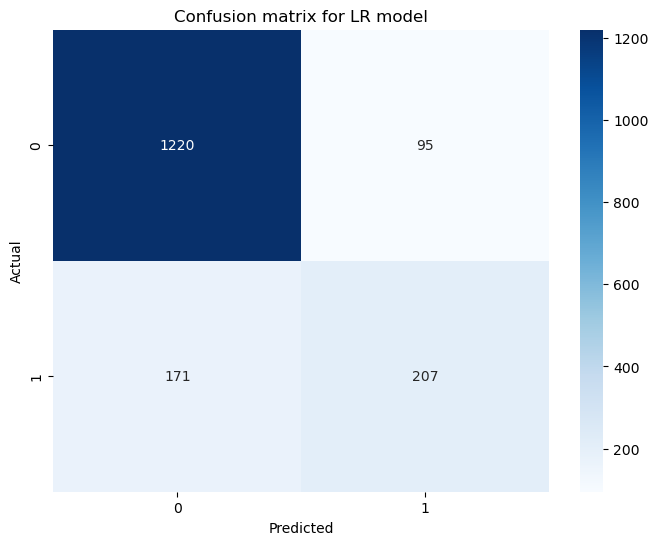

In [226]:
# Plotting heatmap for the confusion matrix of LR model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for LR model')
plt.show()


AUC for Logistic Regression model: 0.8967972317782205


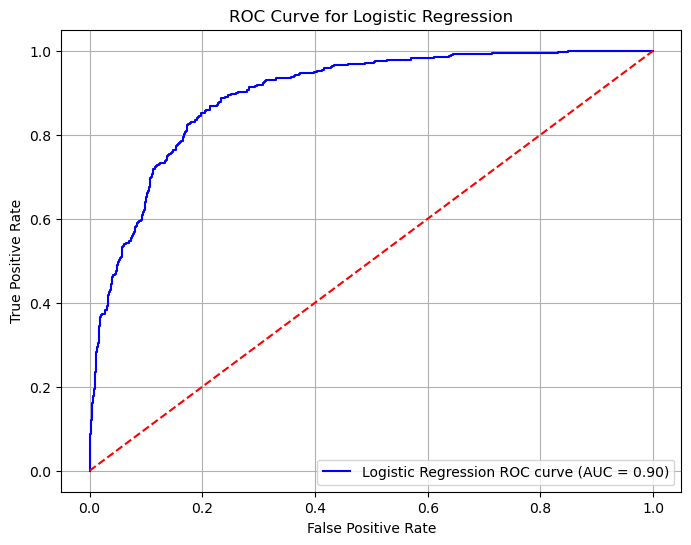

In [228]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Print AUC score
print("\nAUC for Logistic Regression model:", roc_auc_lr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f"Logistic Regression ROC curve (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Random Forest Tuned

Initial Random Forest Model Training and Feature Importance

Top 10 most important features:
                                         feature  importance
137                   felt_sad_hopeless_L12m_yes    0.068604
136                    felt_sad_hopeless_L12m_no    0.068506
2                                Body_mass_index    0.030427
1                                      weight_kg    0.028318
243      sexual_identity_heterosexual_(straight)    0.024160
0                                       height_m    0.023184
90               electronically_bullied_L12m_yes    0.014144
56   current_mental_health_L30d_most_of_the_time    0.014110
160                forced_sexual_intercourse_yes    0.012604
161                                  gender_male    0.011385


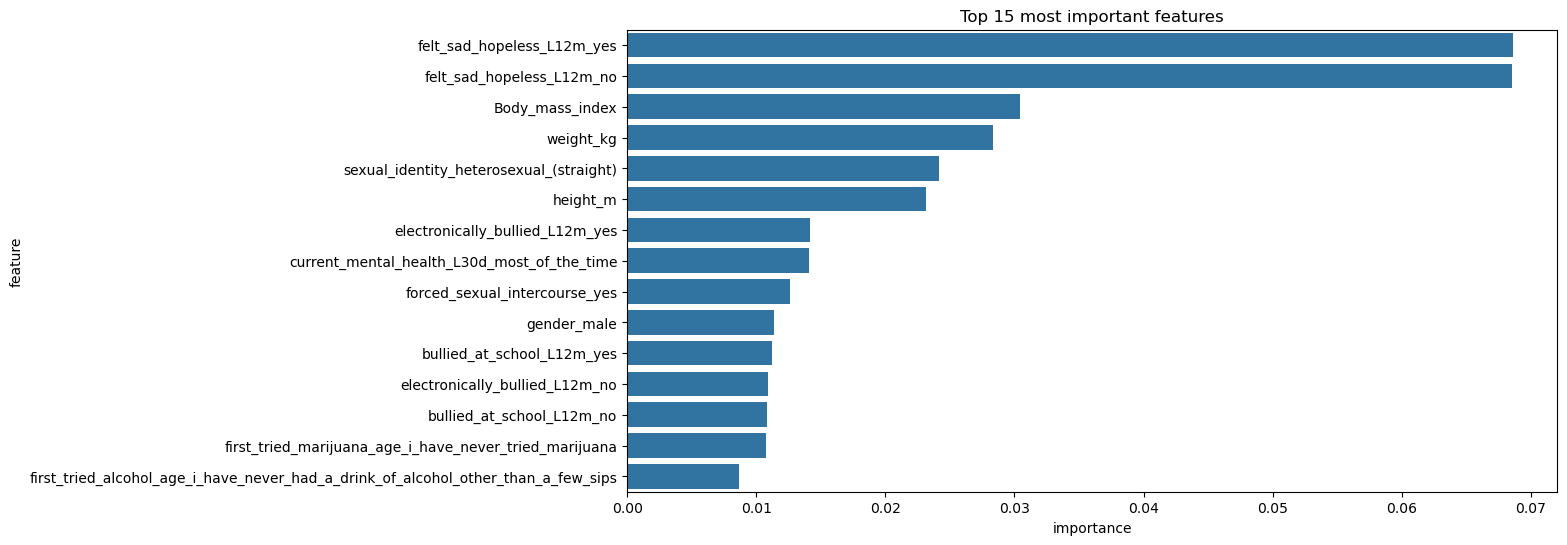


Initial Random Forest Model Evaluation
Accuracy for Random Forest model: 0.8381571175428234
Precision for Random Forest model: 0.7222222222222222
Recall for Random Forest model: 0.4470899470899471
F1 score for Random Forest model: 0.5522875816993464

Confusion Matrix for Random Forest model:
 [[1250   65]
 [ 209  169]]

Classification Report for Random Forest model:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1315
           1       0.72      0.45      0.55       378

    accuracy                           0.84      1693
   macro avg       0.79      0.70      0.73      1693
weighted avg       0.83      0.84      0.82      1693


Hyperparameter Tuning for Random Forest Model
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Random Forest Best Parameters: {'max_depth': 20, 'n_estimators': 200}

Random Forest Tuned Model Evaluation
Random Forest tuned model accuracy: 0.8322504430005907
Random Forest tuned model classi

In [231]:
# Step 1: Initial Training and Feature Importance
print("Initial Random Forest Model Training and Feature Importance")
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)

# Feature importance
feature_cols = X_train.columns
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 most important features')
plt.show()

# Step 2: Predictions and Initial Model Evaluation
y_pred_rf = rf_model.predict(X_test)

print("\nInitial Random Forest Model Evaluation")
print("Accuracy for Random Forest model:", accuracy_score(y_test, y_pred_rf))
print("Precision for Random Forest model:", precision_score(y_test, y_pred_rf))
print("Recall for Random Forest model:", recall_score(y_test, y_pred_rf))
print("F1 score for Random Forest model:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest model:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest model:\n", classification_report(y_test, y_pred_rf))

# Step 3: Hyperparameter Tuning
print("\nHyperparameter Tuning for Random Forest Model")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=123),
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1
)

# Hyperparameter tuning on the training data
rf_grid_search.fit(X_train, y_train)

# Best parameters and best model
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

print("Random Forest Best Parameters:", rf_best_params)

# Step 4: Predictions and Tuned Model Evaluation
rf_tuned_predictions = rf_best_model.predict(X_test)

print("\nRandom Forest Tuned Model Evaluation")
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_predictions)
print("Random Forest tuned model accuracy:", rf_tuned_accuracy)
print("Random Forest tuned model classification report:")
print(classification_report(y_test, rf_tuned_predictions))

# Optional: Confusion Matrix for Tuned Model
print("\nConfusion Matrix for Tuned Random Forest Model:\n", confusion_matrix(y_test, rf_tuned_predictions))


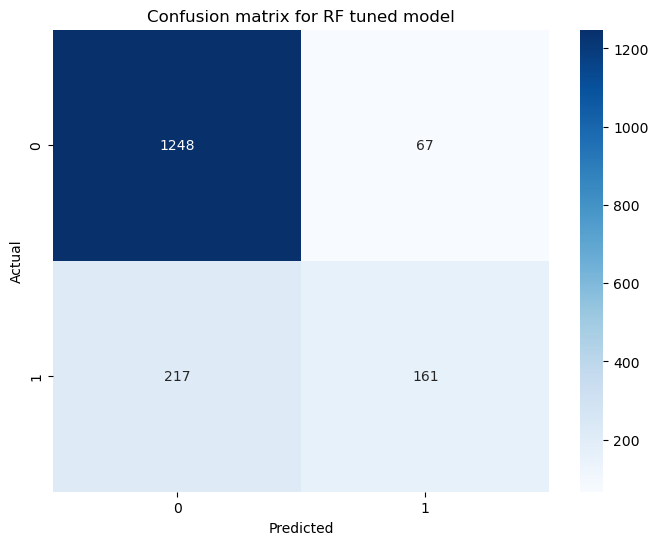

In [232]:
# Plotting heatmap for the confusion matrix of RF tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_tuned_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for RF tuned model')
plt.show()


AUC for Tuned Random Forest model: 0.8875510491480072


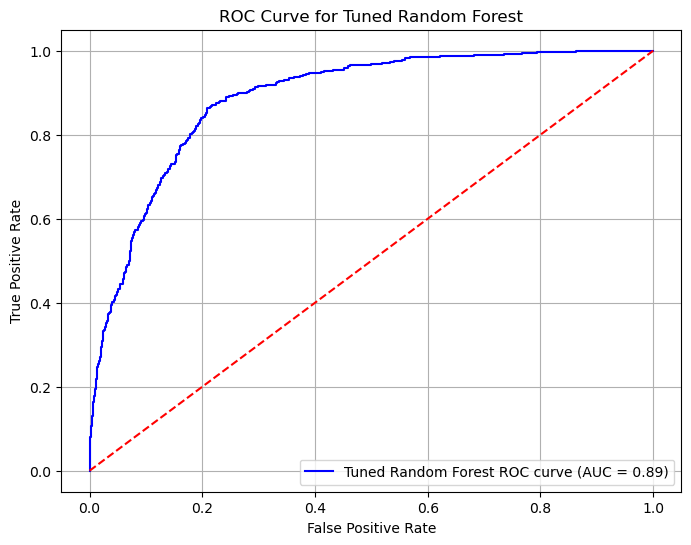

In [233]:
# Predict probabilities for the test set using the best tuned model
rf_tuned_probabilities = rf_best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, rf_tuned_probabilities)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

# Print AUC score
print("\nAUC for Tuned Random Forest model:", roc_auc_rf_tuned)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='blue', label=f"Tuned Random Forest ROC curve (AUC = {roc_auc_rf_tuned:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Tuned Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## XGBoost

In [263]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=123)
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Printing evaluation metrics for XGBoost model
print("\nXGBoost model results:")
print("Accuracy for XGBoost model:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix for XGBoost model:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost model:\n", classification_report(y_test, y_pred_xgb))


XGBoost model results:
Accuracy for XGBoost model: 0.8452451269935026

Confusion Matrix for XGBoost model:
 [[1217   98]
 [ 164  214]]

Classification Report for XGBoost model:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1315
           1       0.69      0.57      0.62       378

    accuracy                           0.85      1693
   macro avg       0.78      0.75      0.76      1693
weighted avg       0.84      0.85      0.84      1693



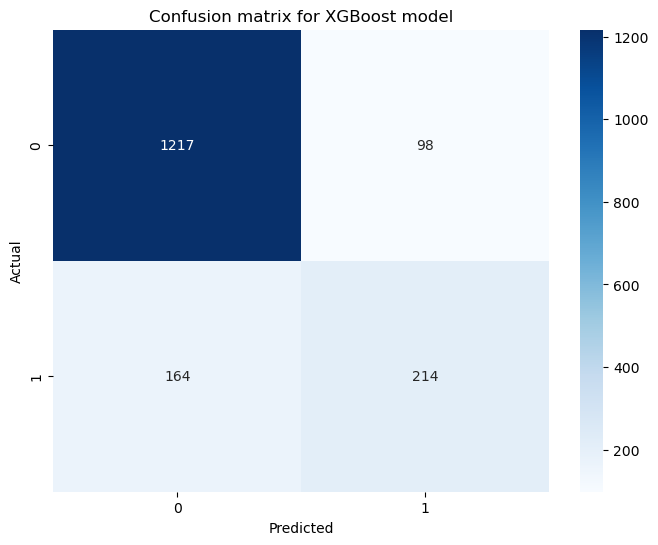

In [265]:
# Plotting heatmap for the confusion matrix of XGBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost model')
plt.show()


AUC for XGBoost model: 0.8785140925825337


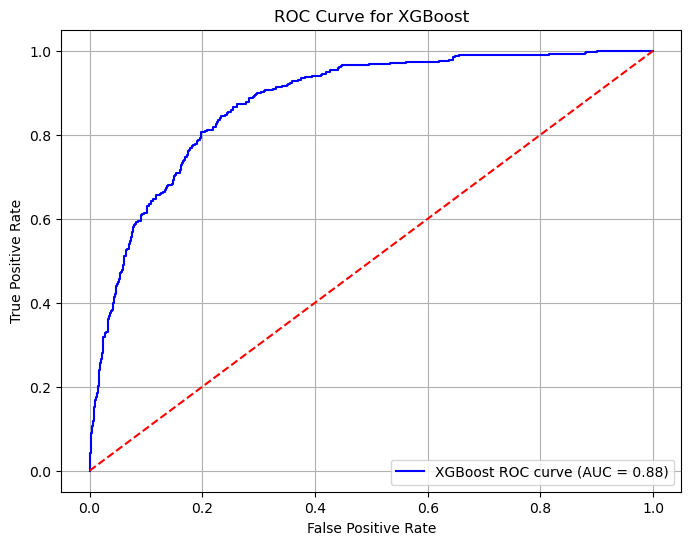

In [267]:
# Predicting probabilities for the test set
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Computing ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Printing AUC score
print("\nAUC for XGBoost model:", roc_auc_xgb)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f"XGBoost ROC curve (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## XGBoost with parameter tuning

In [245]:
# Defining the XGBoost model
xgb_model = XGBClassifier(random_state=123)

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fitting the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Getting the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Predicting on the test set using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Printing evaluation metrics for the best XGBoost model
print("\nBest XGBoost model results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy for XGBoost model:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix for XGBoost model:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost model:\n", classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best XGBoost model results:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Accuracy for XGBoost model: 0.8499704666272888

Confusion Matrix for XGBoost model:
 [[1237   78]
 [ 176  202]]

Classification Report for XGBoost model:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1315
           1       0.72      0.53      0.61       378

    accuracy                           0.85      1693
   macro avg       0.80      0.74      0.76      1693
weighted avg       0.84      0.85      0.84      1693



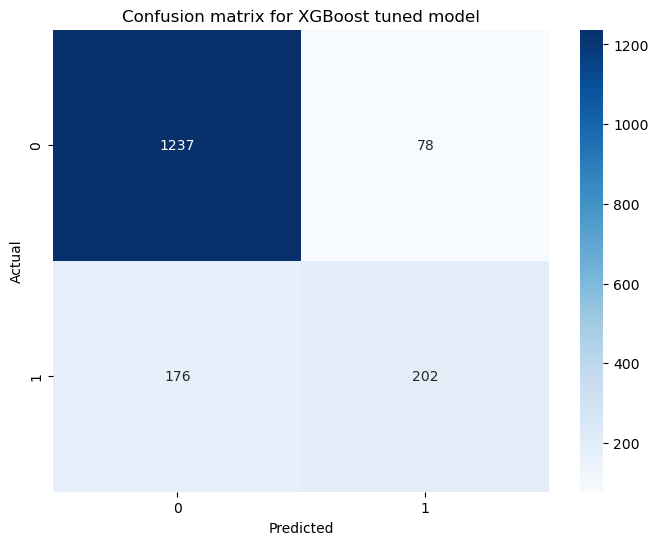

In [246]:
# Plotting heatmap for the confusion matrix of XGBoost tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost tuned model')
plt.show()


AUC for XGBoost model: 0.8980475586939466


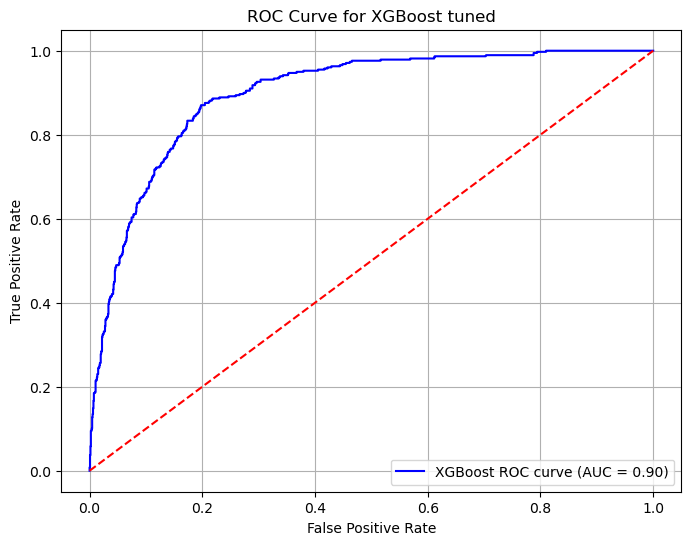

In [249]:
# Predicting probabilities for the test set
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Computing ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)  # fpr: False Positive Rate, tpr: True Positive Rate
roc_auc = auc(fpr, tpr)

# Printing AUC score
print("\nAUC for XGBoost model:", roc_auc)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"XGBoost ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost tuned")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Naive Bayes

In [252]:
# Initializing and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_nb = nb_model.predict(X_test)

# Printing evaluation metrics for Naive Bayes model
print("\nNaive Bayes model results:")
print("Accuracy for Naive Bayes model:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix for Naive Bayes model:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report for Naive Bayes model:\n", classification_report(y_test, y_pred_nb))


Naive Bayes model results:
Accuracy for Naive Bayes model: 0.7566450088600118

Confusion Matrix for Naive Bayes model:
 [[1086  229]
 [ 183  195]]

Classification Report for Naive Bayes model:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1315
           1       0.46      0.52      0.49       378

    accuracy                           0.76      1693
   macro avg       0.66      0.67      0.66      1693
weighted avg       0.77      0.76      0.76      1693



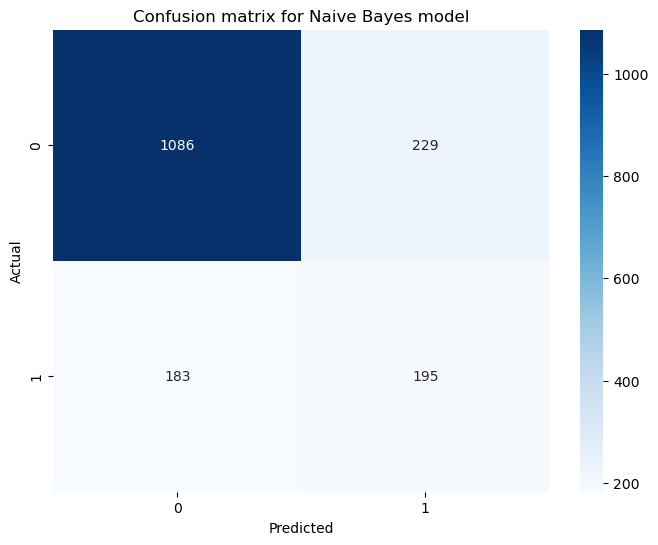

In [254]:
# Plotting heatmap for the confusion matrix of Naive Bayes model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Naive Bayes model')
plt.show()


AUC for Naive Bayes model: 0.7950318868569819


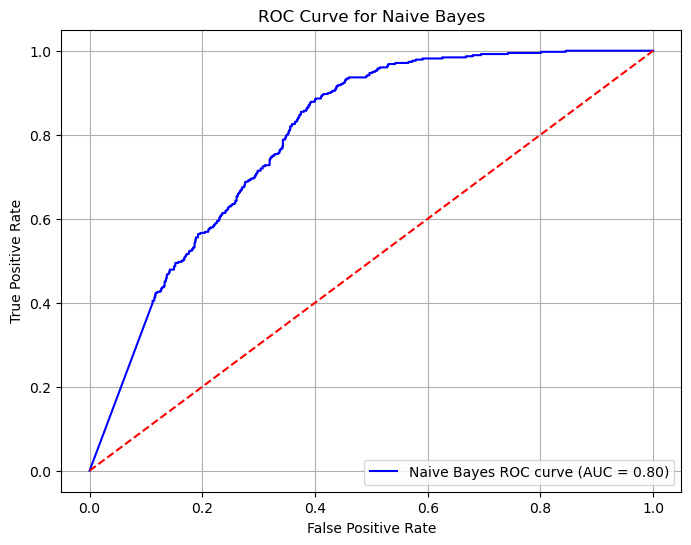

In [256]:
# Predicting probabilities for the test set
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Computing ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Printing AUC score
print("\nAUC for Naive Bayes model:", roc_auc_nb)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label=f"Naive Bayes ROC curve (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Modeling Observation

The following analysis evaluates six models — Random Forest, Random Forest (Tuned), XGBoost, XGBoost (Tuned), Logistic Regression, and Naive Bayes — based on key metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **AUC**. Each metric highlights specific aspects of model performance, providing insights into their strengths and limitations:

### 1. **Random Forest**
- **Metrics**:
  - **Accuracy:** 83.82%
  - **Precision:** 72.22%
  - **Recall:** 44.71%
  - **F1-Score:** 55.23%
  - **AUC:** 0.89
- **Key Observations**:
  - Random Forest demonstrates high accuracy and precision, indicating its strength in correctly identifying negative cases (label "0").
  - However, its recall (44.71%) is relatively low, which means it struggles to correctly identify all positive cases (label "1").
  - The F1-score (55.23%) reflects the imbalance between precision and recall, suggesting that this model is not optimal for applications where detecting positives is critical.
  - The ROC-AUC score (0.89) indicates strong discriminatory power overall.

---

### 2. **Random Forest (Tuned)**
- **Metrics**:
  - **Accuracy:** 83.23%
  - **Precision:** 71.00%
  - **Recall:** 43.00%
  - **F1-Score:** 53.00%
  - **AUC:** 0.89
- **Key Observations**:
  - The tuned version of Random Forest does not show significant improvement over the default model.
  - Recall (43.00%) remains low, while accuracy (83.23%) and precision (71.00%) are similar to the untuned version.
  - The F1-score drops slightly to 53.00%, reflecting a less balanced performance.
  - Despite tuning, the AUC remains constant at 0.89, suggesting that hyperparameter optimization did not enhance the model’s ability to differentiate between classes.

---

### 3. **XGBoost**
- **Metrics**:
  - **Accuracy:** 84.52%
  - **Precision:** 69.00%
  - **Recall:** 57.00%
  - **F1-Score:** 62.00%
  - **AUC:** 0.88
- **Key Observations**:
  - XGBoost outperforms Random Forest in recall (57.00%), indicating that it is better at identifying positive cases (label "1").
  - The precision (69.00%) is slightly lower than Random Forest but still balanced relative to recall, resulting in a higher F1-score (62.00%).
  - Accuracy (84.52%) is marginally better than both Random Forest models.
  - The AUC (0.88) is slightly lower than Random Forest, indicating slightly less discriminatory power overall.

---

### 4. **XGBoost (Tuned)**
- **Metrics**:
  - **Accuracy:** 84.99%
  - **Precision:** 72.00%
  - **Recall:** 53.00%
  - **F1-Score:** 61.00%
  - **AUC:** 0.90
- **Key Observations**:
  - Tuning significantly improves XGBoost’s AUC (0.90), bringing it on par with Logistic Regression.
  - Precision (72.00%) increases compared to the untuned version, reflecting better performance in identifying true positives among predicted positives.
  - Recall (53.00%) is slightly lower than untuned XGBoost but is offset by better precision, maintaining an F1-score of 61.00%.
  - This model achieves the highest accuracy (84.99%) among all models, making it the most reliable for overall prediction tasks.

---

### 5. **Logistic Regression**
- **Metrics**:
  - **Accuracy:** 84.29%
  - **Precision:** 69.00%
  - **Recall:** 55.00%
  - **F1-Score:** 61.00%
  - **AUC:** 0.90
- **Key Observations**:
  - Logistic Regression performs consistently well, achieving a high AUC (0.90) and balanced precision (69.00%) and recall (55.00%).
  - The F1-score (61.00%) is on par with XGBoost (Tuned), demonstrating a good balance between identifying positive cases and minimizing false positives.
  - Accuracy (84.29%) is competitive with XGBoost models, making it a strong contender for practical use.
  - As a simpler model, Logistic Regression offers a good trade-off between performance and interpretability, with fewer computational requirements than tree-based models.

---

### 6. **Naive Bayes**
- **Metrics**:
  - **Accuracy:** 75.66%
  - **Precision:** 46.00%
  - **Recall:** 52.00%
  - **F1-Score:** 49.00%
  - **AUC:** 0.80
- **Key Observations**:
  - Naive Bayes significantly underperforms compared to all other models across all metrics.
  - While recall (52.00%) is moderate, precision (46.00%) is very low, resulting in the poorest F1-score (49.00%).
  - Accuracy (75.66%) and AUC (0.80) reflect limited discriminatory power, suggesting that this model is unsuitable for this dataset.
  - The high false positive rate (as seen in the ROC curve) further diminishes its reliability.

---

## Key Comparisons

| Metric            | Random Forest | RF (Tuned) | XGBoost | XGBoost (Tuned) | Logistic Regression | Naive Bayes |
|--------------------|---------------|------------|---------|-----------------|---------------------|-------------|
| **Accuracy**       | 83.82%        | 83.23%     | 84.52%  | **84.99%**      | 84.29%              | 75.66%      |
| **Precision**      | 72.22%        | 71.00%     | 69.00%  | **72.00%**      | 69.00%              | 46.00%      |
| **Recall**         | 44.71%        | 43.00%     | **57.00%**  | 53.00%          | 55.00%              | 52.00%      |
| **F1-Score**       | 55.23%        | 53.00%     | **62.00%**  | 61.00%          | 61.00%              | 49.00%      |
| **AUC**            | 0.89          | 0.89       | 0.88    | **0.90**        | **0.90**            | 0.80        |

---

## Final Observations and Conclusion

1. **Best-Performing Model**:  
   - **XGBoost (Tuned)** emerges as the best model due to its superior accuracy (84.99%), highest AUC (0.90, tied with Logistic Regression), and strong precision-recall balance.
   - It demonstrates the most consistent performance, making it highly reliable for both classification accuracy and identifying positive cases.

2. **Close Contender**:  
   - **Logistic Regression** performs comparably to XGBoost (Tuned) in AUC (0.90) and F1-score (61.00%). Its simplicity and interpretability make it an excellent choice for use cases requiring less computational complexity.

3. **Underperforming Models**:  
   - **Naive Bayes** lags behind in all metrics, with an F1-score of 49.00% and an AUC of 0.80, indicating limited suitability for this task.
   - **Random Forest (Tuned)** offers minimal improvement over the default Random Forest, highlighting limited gains from hyperparameter tuning.

4. **Key Insights**:  
   - The trade-off between precision and recall is evident across models. For applications prioritizing true positive detection (high recall), XGBoost and Logistic Regression are better suited.
   - Simpler models like Logistic Regression can achieve competitive performance without the computational overhead of tree-based models like XGBoost or Random Forest.

**Conclusion**:  
The **XGBoost (Tuned)** model is recommended as the best-performing model based on its superior accuracy, balanced precision and recall, and highest AUC score, ensuring robust classification performance. Logistic Regression is a close second, providing strong performance with higher interpretability and computational efficiency.